# Wealthfront - Senior Data Scientist Take Home
Aggregated Insights and Results: https://docs.google.com/document/d/1sPmrayhbjoEqW2EJGwNW2IrhPU60vmn6UUGnbqCdXNM/edit?usp=sharing

### Goal: Create and evaluate a model that will predict whether a loan is "good" or "bad".

Dataset Description: All the data you need is in the attached CSV file. This table contains the following fields:

row_id - A unique id for the row

customer_id — A unique id for the loan borrower

loan_amount — The amount of the loan requested by the borrower

funded_amount — The amount of the loan that was actually provided to the borrower

term — The term of the loan

interest_rate — The interest rate for the loan

installment — The monthly payment

emp_length — Borrower's length of employment at their last job

home_owner — Borrower's home ownership status

annual_income — Borrower's annual income

loan_status — Status of the loan

purchase — Purpose of the loan

addr_state — Borrower's state of residence

dti — Borrower's debt to income ratio

delinq_2yrs — The frequency of the borrower's credit delinquencies in the last 2 years

earliest_cr_line — The date the borrower started his/her first credit line (credit card, etc. )

months_since_last_delinq — The number of months since the borrower was last delinquent on a payment

open_acc — The number of the borrower's open credit accounts

revol_bal — The borrower's credit card (i.e. revolving credit line) balance

total_accounts — The number of the borrower's total credit accounts

outstanding_principal — Outstanding principal of the loan

total_payment — Total payment on the loan so far

total_received_principal — Total principal payments received on the loan so far

total_received_interest — Total interest payments received on the loan so far

In [182]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [183]:
path = '/Users/isaacgolberg/Downloads/loan_data.csv'

In [184]:
df = pd.read_csv(path)

In [185]:
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3
0,571203,18000,18000,60 months,10.16,383.87,10+ years,MORTGAGE,72804.0,Current,...,13263.18,7273.77,4736.82,2536.95,NaN,NaN,10.16%,NaN,NaN,10.16
1,694891,15675,15675,36 months,8.90,497.74,10+ years,MORTGAGE,100000.0,Current,...,15294.25,496.78,380.75,116.03,NaN,NaN,8.90%,NaN,NaN,8.90
2,784712,16500,16500,60 months,7.90,333.78,2 years,MORTGAGE,42000.0,Late (31-120 days),...,12966.64,5000.85,3533.36,1467.49,NaN,NaN,7.90%,NaN,NaN,7.90
3,843448,5500,5500,36 months,13.67,187.10,3 years,RENT,55000.0,Fully Paid,...,0.00,5792.14,5500.00,292.14,NaN,NaN,13.67%,NaN,NaN,13.67
4,974654,6400,6400,36 months,15.80,224.38,2 years,RENT,34000.0,Current,...,4430.59,2912.26,1969.41,942.85,NaN,NaN,15.80%,NaN,NaN,15.80


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      10000 non-null  int64  
 1   loan_amnt               10000 non-null  int64  
 2   funded_amnt             10000 non-null  int64  
 3   term                    9524 non-null   object 
 4   int_rate                9524 non-null   float64
 5   installment             9524 non-null   float64
 6   emp_length              9119 non-null   object 
 7   home_ownership          9524 non-null   object 
 8   annual_inc              9524 non-null   float64
 9   loan_status             9524 non-null   object 
 10  purpose                 9524 non-null   object 
 11  addr_state              10000 non-null  object 
 12  dti                     9524 non-null   float64
 13  delinq_2yrs             9524 non-null   float64
 14  earliest_cr_line        9524 non-null  

In [187]:
df.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
term                        476
int_rate                    476
installment                 476
emp_length                  881
home_ownership              476
annual_inc                  476
loan_status                 476
purpose                     476
addr_state                    0
dti                         476
delinq_2yrs                 476
earliest_cr_line            476
mths_since_last_delinq     5900
open_acc                    476
revol_bal                   476
total_acc                   476
out_prncp                   476
total_pymnt                 476
total_rec_prncp             476
total_rec_int               476
wtd_loans                 10000
interest_rate             10000
int_rate2                   476
num_rate                  10000
numrate                   10000
int_rate3                   476
dtype: int64

##### Some columns can be safely dropped since they are comprised of all null values.

In [188]:
df = df.drop(columns=['wtd_loans', 'interest_rate', 'num_rate', 'numrate'])

In [190]:
df.describe()

,id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,int_rate3
count,1.000000e+04,10000.000000,10000.00000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,4100.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000,9524.000000
mean,5.143648e+06,14054.807500,14052.73000,14.277852,442.626605,71655.752245,17.146927,0.238765,34.988537,11.043784,15982.998215,24.517640,10253.674229,5225.240946,3808.501311,1412.893987,14.277852
std,2.827944e+06,8108.658728,8107.69323,4.430159,244.522116,45362.834495,7.591601,0.691455,21.474509,4.561028,15177.648105,10.887693,7963.300050,5499.478657,4801.501191,1489.227516,4.430159
min,5.712030e+05,1000.000000,1000.00000,6.030000,30.440000,7500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,34.140000,22.500000,11.640000,6.030000
25%,2.300882e+06,8000.000000,8000.00000,11.140000,266.575000,45000.000000,11.520000,0.000000,17.000000,8.000000,7151.000000,17.000000,4273.387500,1676.312500,1027.525000,468.112500,11.140000
50%,5.605038e+06,12000.000000,12000.00000,14.090000,398.510000,61000.000000,16.840000,0.000000,32.000000,10.000000,12495.000000,23.000000,8745.425000,3500.040000,2237.870000,947.000000,14.090000
75%,7.435741e+06,19400.000000,19400.00000,17.270000,576.737500,86000.000000,22.590000,0.000000,49.000000,14.000000,20596.000000,31.000000,15055.437500,6736.965000,4544.470000,1777.870000,17.270000
max,1.012507e+07,35000.000000,35000.00000,26.060000,1388.450000,1000000.000000,34.980000,11.000000,122.000000,39.000000,376679.000000,68.000000,34413.520000,44231.080000,35000.010000,13514.550000,26.060000


##### We see some key insights from this.
- The average requested amount for the loan is close to the average funded amount. That means most customers in our dataset got the amount they had requested (or very close to it).
- The average term of these loans is 41.68 months with a 14.28 interest rate.
- Our customers have an average income of 71,655 but this variable is likely inflated by some customers that have high incomes.
- int_rate, int_rate2 and int_rate3 have the same metrics. We may end up dropping two of them.
- The total principal we have received and the total interest we have received is under the total we have funded on average.
##### Additional insights can be pulled from these summary stats about our dataset depending on stakeholder intererst.

In [191]:
df.describe(include='object')

,term,emp_length,home_ownership,loan_status,purpose,addr_state,earliest_cr_line,int_rate2
count,9524,9119,9524,9524,9524,10000,9524,9524
unique,2,11,5,7,13,45,9397,134
top,36 months,10+ years,MORTGAGE,Current,debt_consolidation,CA,1999-05-05 12:00:00,12.12%
freq,7269,3054,4839,8122,5665,1685,4,485


##### We see above that some of the objects will need additional handling. earliest_cr_line is an object but it is a timestamp and int_rate2 has percentages at the end that need to be removed.

In [192]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['days_since_earliest_cr_line'] = (datetime.now() - df['earliest_cr_line']).dt.days

##### I have created a usable feature from earliest_cr_line that tells us the age of a user's credit history (specifically there earliest credit tradeline). Since I did not know when this data was collected, I opted to using today's date when calculating this feature. Using today's date might introduce some inaccuracies, especially if the data was collected a significant time ago. The age of credit history will be slightly overestimated. The relative comparisons between borrowers' credit histories remain valid and it’s the relative age that often matters more in analysis and modeling. However, this needs to be taken into account during scoring if we use the model to generate future predictions.

In [193]:
df['int_rate2'] = df['int_rate2'].str.replace('%', '').astype(float)

In [194]:
df.term.unique()

array([' 60 months', ' 36 months', nan], dtype=object)

In [195]:
df['term'] = df['term'].str.replace(' months', '', regex=False).astype(float)

In [196]:
df.term.unique()

array([60., 36., nan])

In [197]:
df.emp_length.unique()

array(['10+ years', '2 years', '3 years', '7 years', '6 years', '4 years',
       '5 years', '8 years', nan, '1 year', '< 1 year', '9 years'],
      dtype=object)

##### Depending on the model we use, we may want to convert this from a categorical variable, but I'll leave it as is for now

In [198]:
df[df['dti'].isnull()].isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
term                           476
int_rate                       476
installment                    476
emp_length                     476
home_ownership                 476
annual_inc                     476
loan_status                    476
purpose                        476
addr_state                       0
dti                            476
delinq_2yrs                    476
earliest_cr_line               476
mths_since_last_delinq         476
open_acc                       476
revol_bal                      476
total_acc                      476
out_prncp                      476
total_pymnt                    476
total_rec_prncp                476
total_rec_int                  476
int_rate2                      476
int_rate3                      476
days_since_earliest_cr_line    476
dtype: int64

In [199]:
df[df['dti'].isnull()]['loan_status'].unique()

array([nan], dtype=object)

##### I noticed that when dti is null, most of the other variables are null as well. These observations offer little information for the model to learn from so we can drop them. I investigated dti because it may be null for a variety of reasons. DTI is a ratio so if the customer had no income then the division would be undefined. It seems in our case they are missing almost all features and our model wouldn't learn anything. I would want to speak with the team about this because these could also be credit invisible users which may still have value, but would need special handling as they do not have much credit history. On the other hand, we may just be missing data for these customers.

In [200]:
df.loan_status.value_counts()

Current               8122
Fully Paid             951
Charged Off            218
Late (31-120 days)     148
In Grace Period         48
Late (16-30 days)       21
Default                 16
Name: loan_status, dtype: int64

##### Based on the values of loan_status, we will group values as either "good" or "bad". Even with this categorization we will still have a significant class imbalance.

In [201]:
def classify_loan(status):
    if status in ['Fully Paid', 'Current']:
        return 'Good'
    elif status in ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Default']:
        return 'Bad'
    else:
        return 'Undetermined'  # For NaN or any other undefined statuses

df['loan_quality'] = df['loan_status'].apply(classify_loan)

print(df['loan_quality'].value_counts())


Good            9073
Undetermined     476
Bad              451
Name: loan_quality, dtype: int64


###### We will conduct EDA with all three classes, but most likely we will only model on Good and Bad unless the data reveals a clear relationship of undetermined to one of the classes. After further analysis, the 476 records that were grouped into Undetermined are also the records that have most of the features as null (found during dti investigation). We can safely drop these 476 observations.

In [202]:
df = df[df['loan_quality'] != 'Undetermined']

In [203]:
df['int_rate'].equals(df['int_rate2'])

True

In [204]:
df['int_rate2'].equals(df['int_rate3'])

True

##### We can drop two of the interest columns as they are identical.

In [205]:
df.drop(columns=['int_rate2', 'int_rate3'], axis=1, inplace=True)

In [206]:
sns.set(style="whitegrid")

def plot_data_distribution(data, column, plot_type='hist', bins=10):
    """
    Function to plot data distribution for a given column.
    """
    plt.figure(figsize=(10, 6))

    if plot_type == 'hist':
        sns.histplot(data, x=column, bins=bins, kde=True)
        plt.title(f'Distribution of {column}')
        avg = df[column].mean()
        plt.axvline(avg, color='red', linestyle='dashed', linewidth=1, label=f"Average: {avg:.2f}")
        median = df[col].median()
        plt.axvline(median, color='green', linestyle='dotted', linewidth=1, label=f"Median: {median:.2f}")
        plt.legend()
    elif plot_type == 'count':
        sns.countplot(x=column, data=data)
        plt.title(f'Count Plot of {column}')
        plt.xticks(rotation=45)
    elif plot_type == 'box':
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot of {column}')

    plt.show()

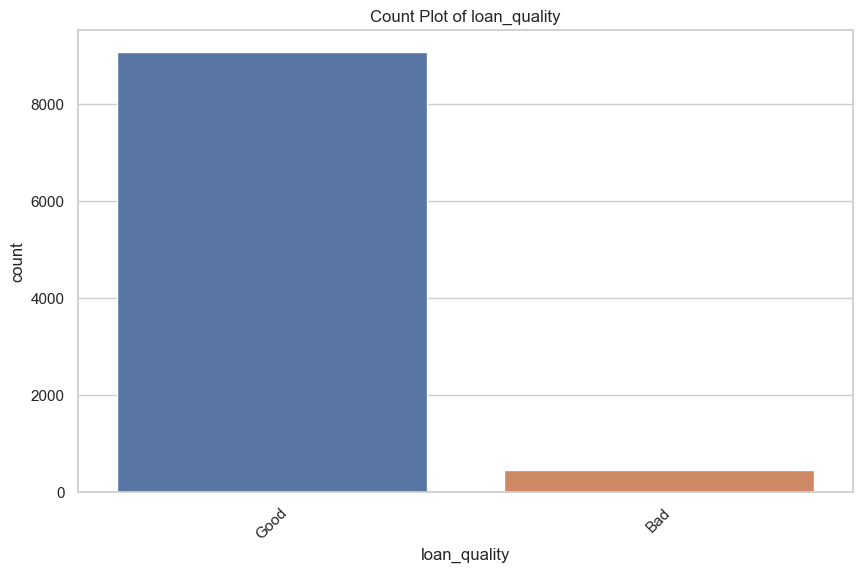

In [207]:
plot_data_distribution(df, 'loan_quality', plot_type='count')

##### Even after grouping the loan status, we still have a signifcant class imbalance that will need to be kept in mind during EDA as well as modeling.

In [208]:
numeric_features = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'mths_since_last_delinq',
       'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int']

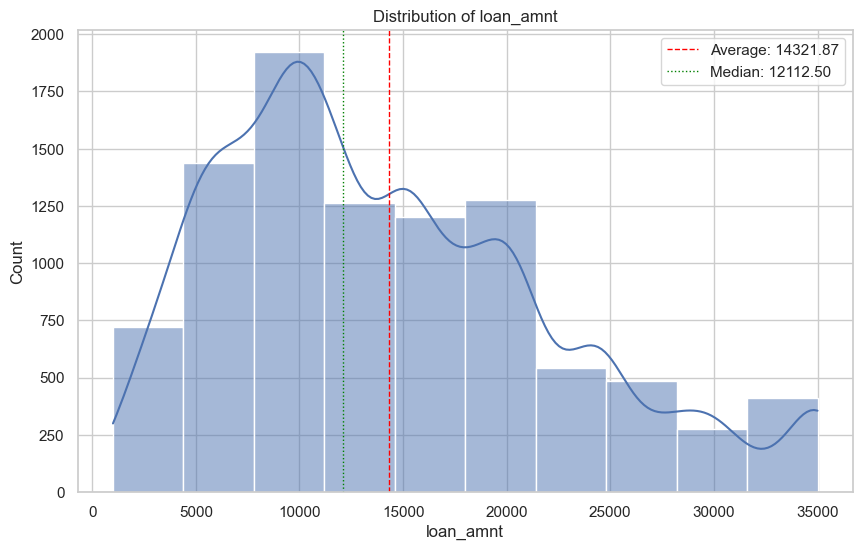

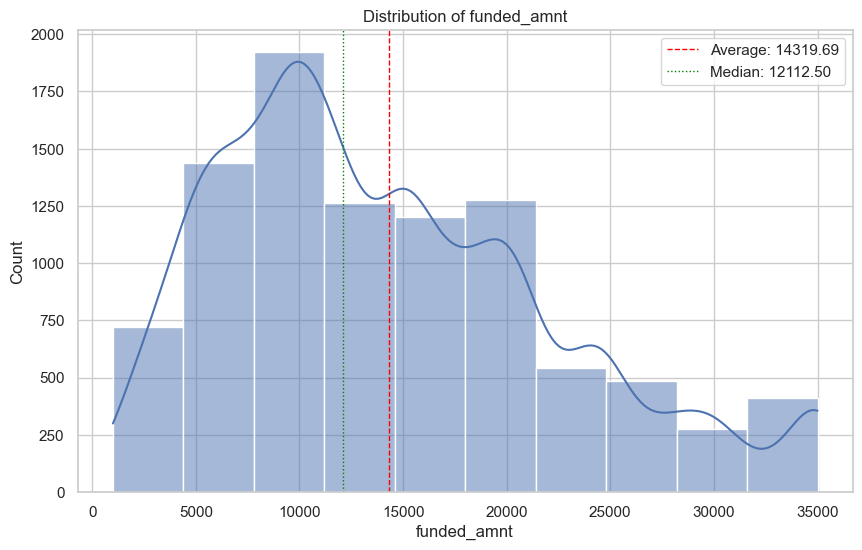

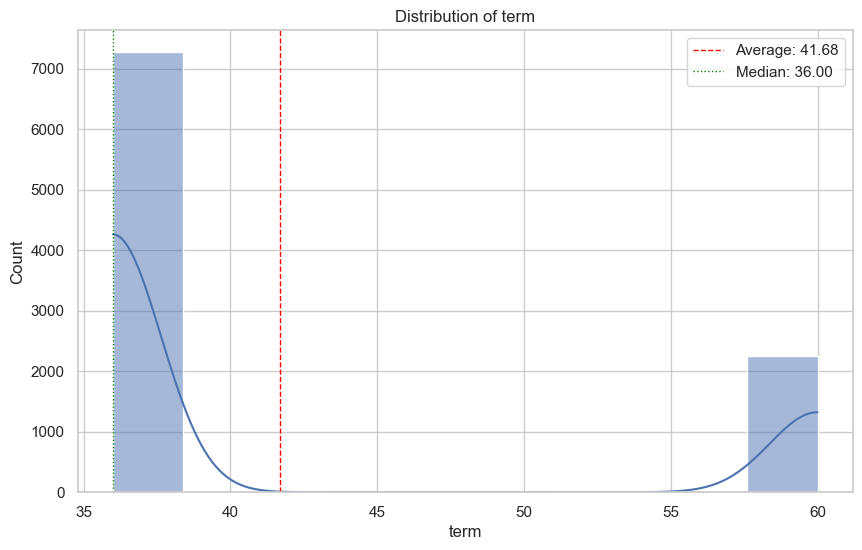

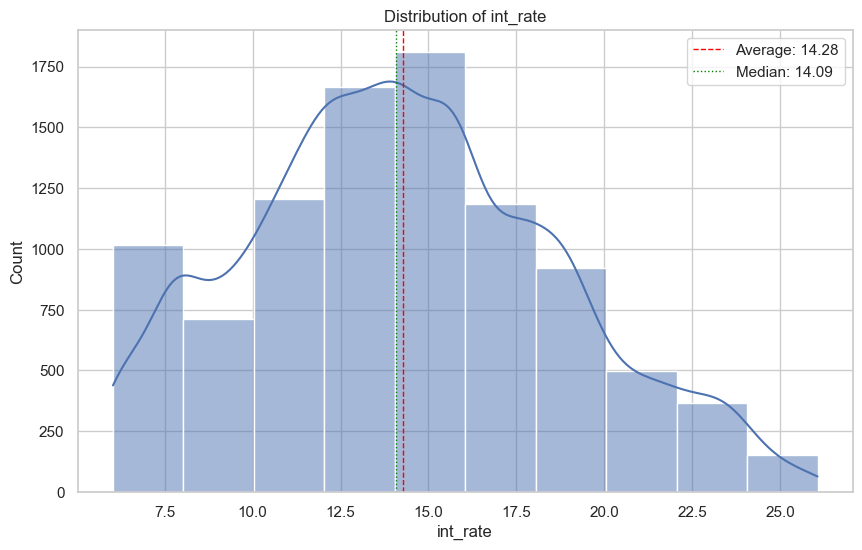

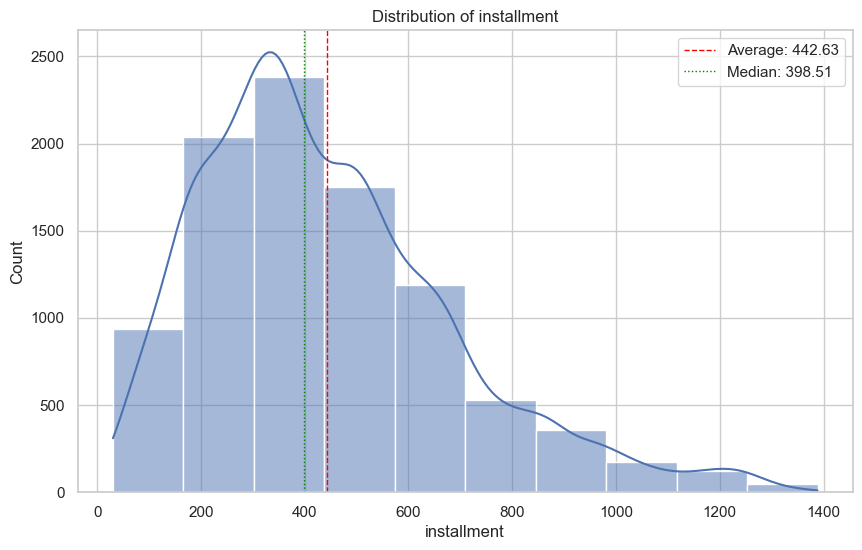

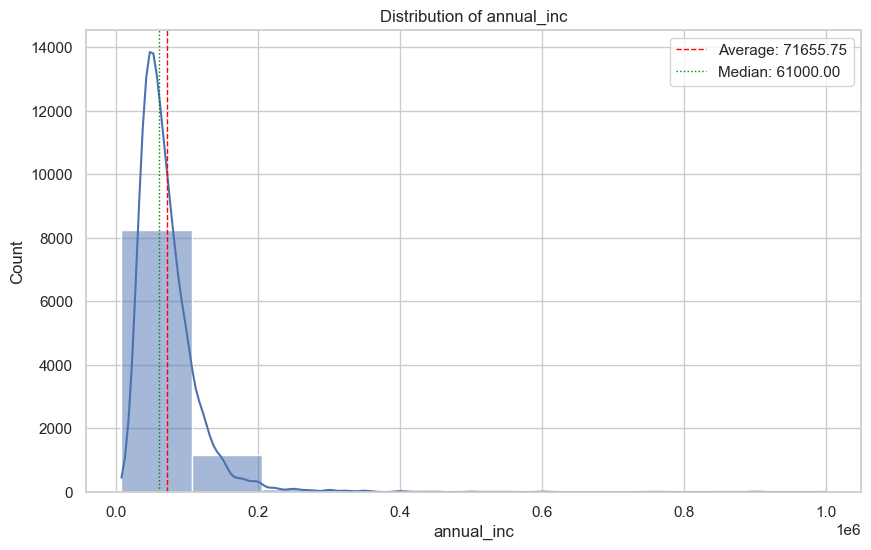

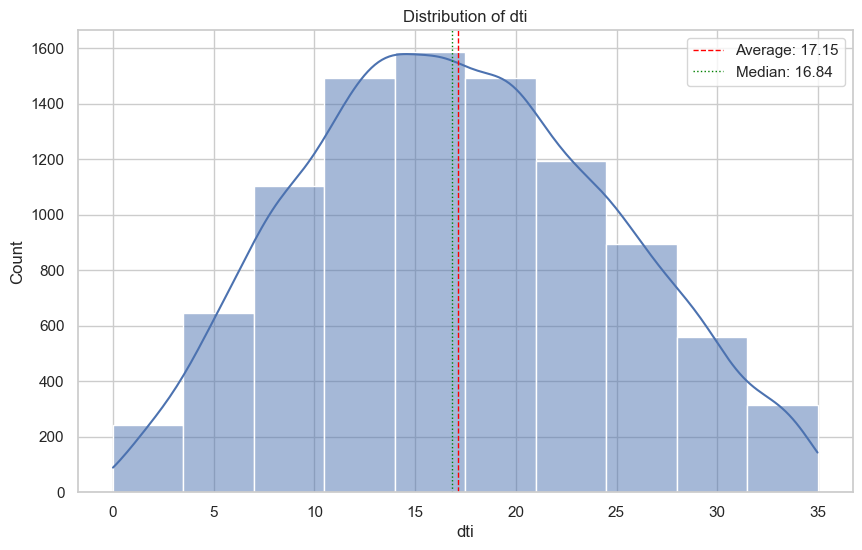

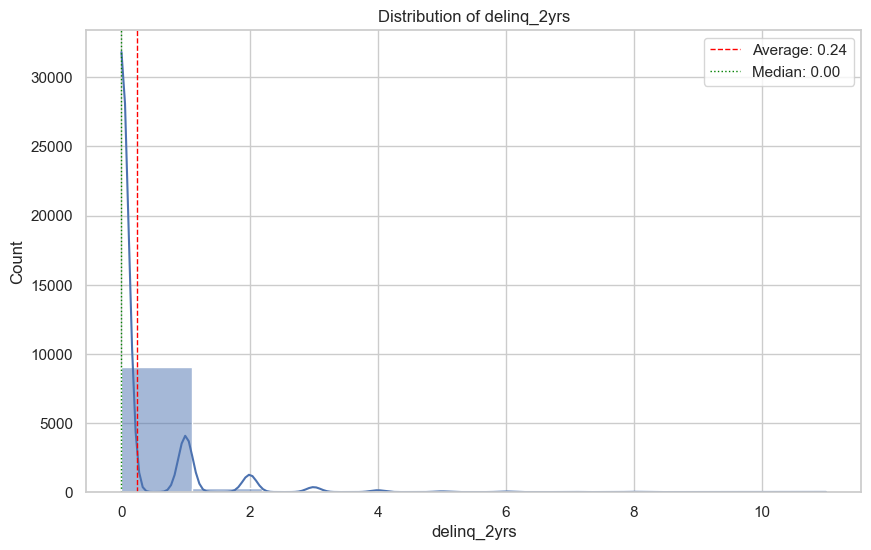

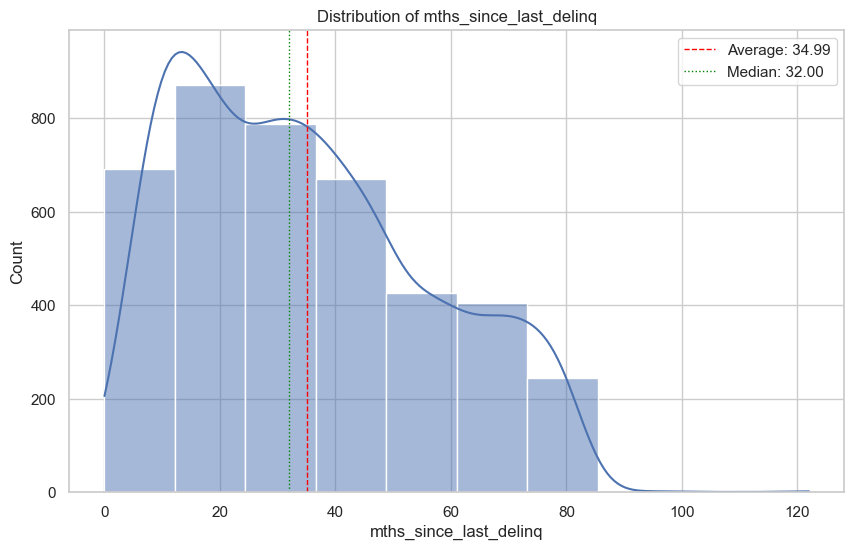

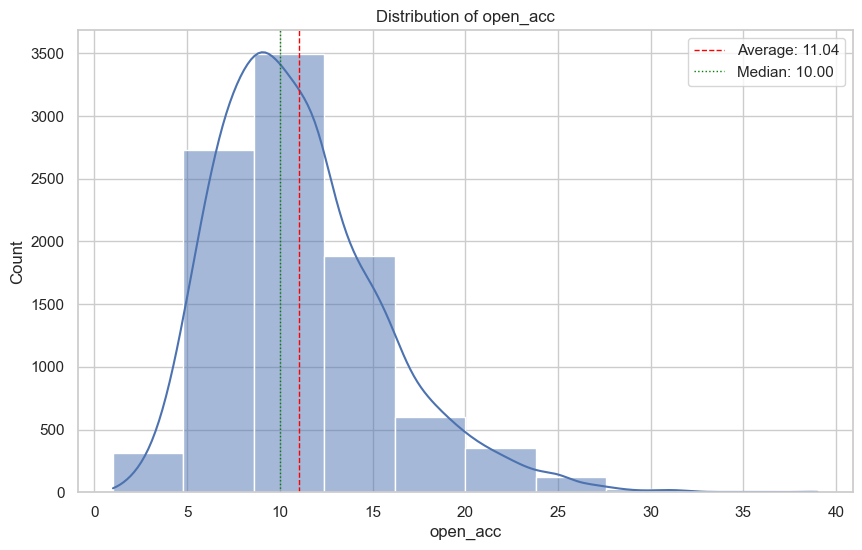

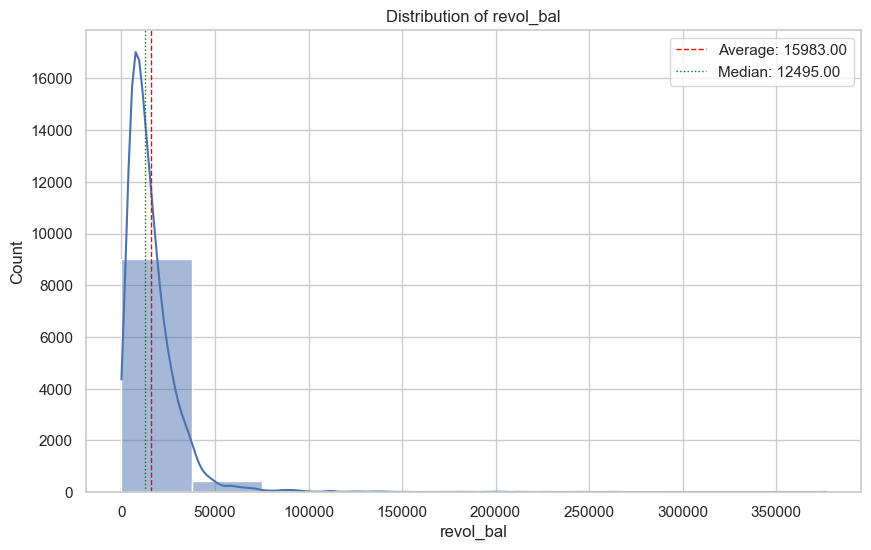

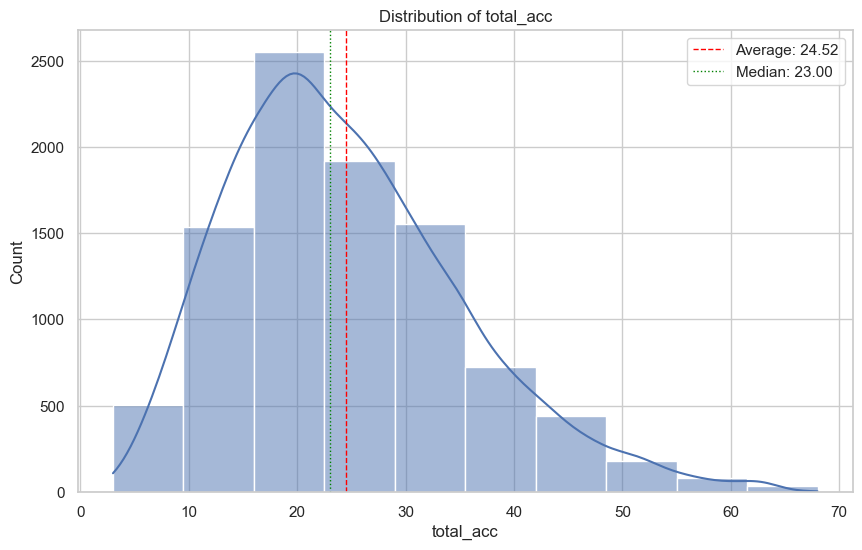

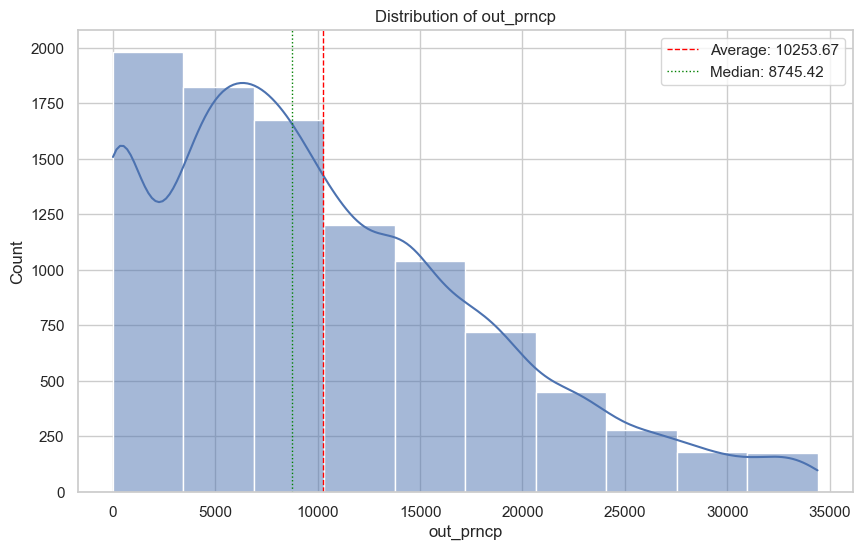

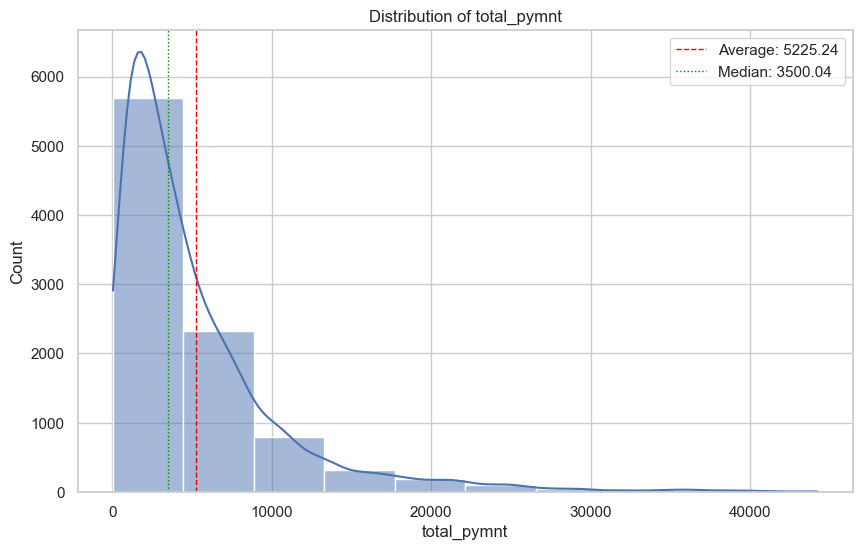

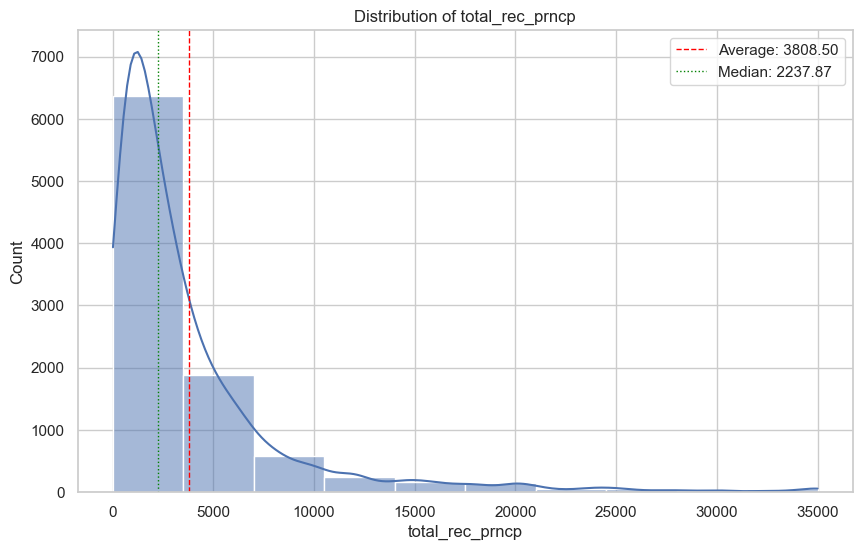

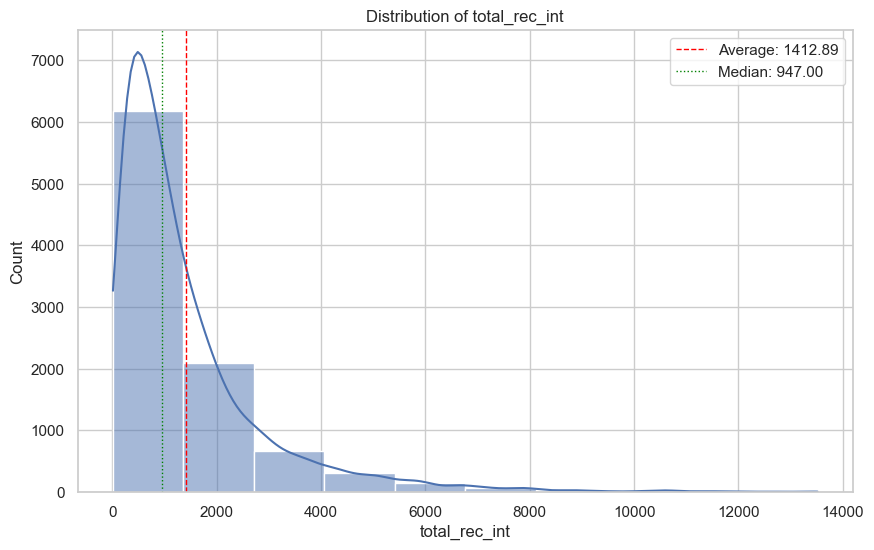

In [209]:
for col in numeric_features:
    plot_data_distribution(df, col, plot_type='hist')

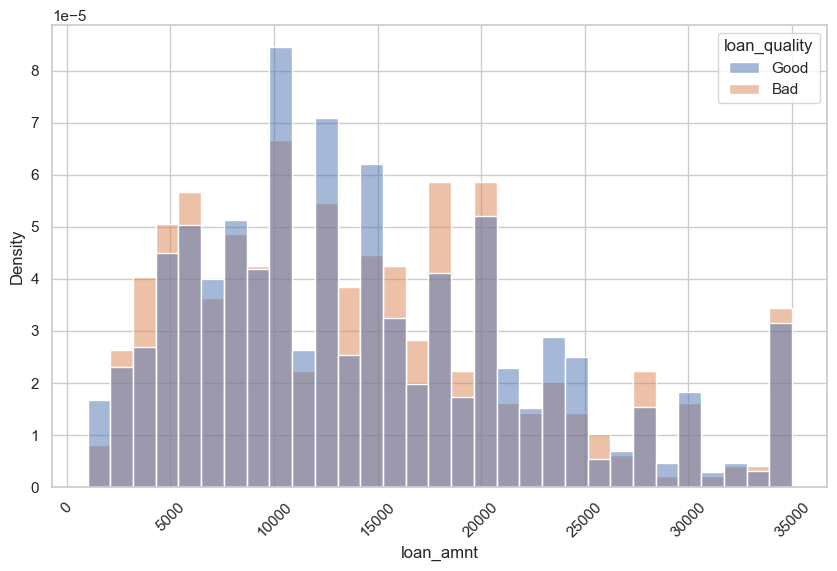

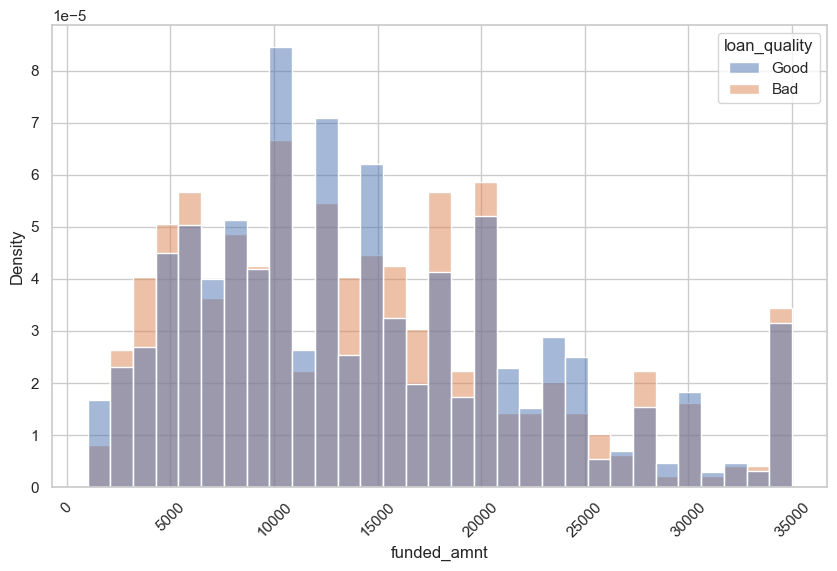

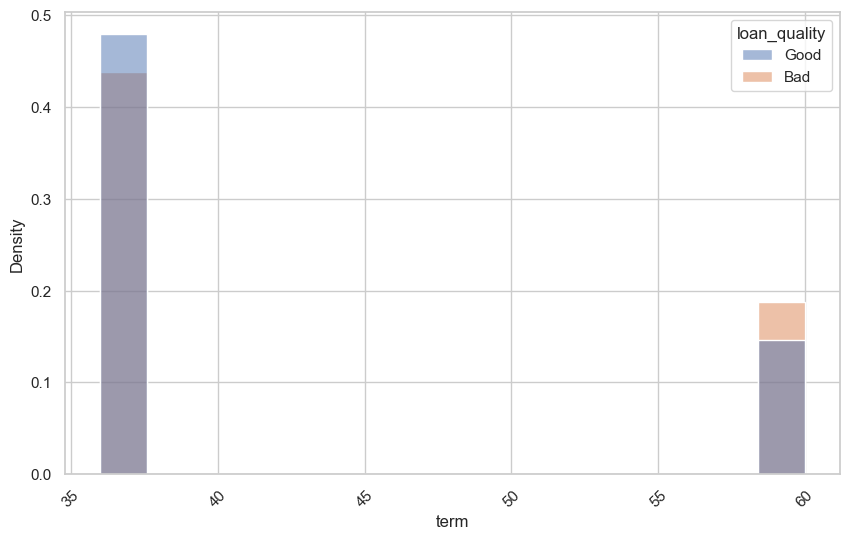

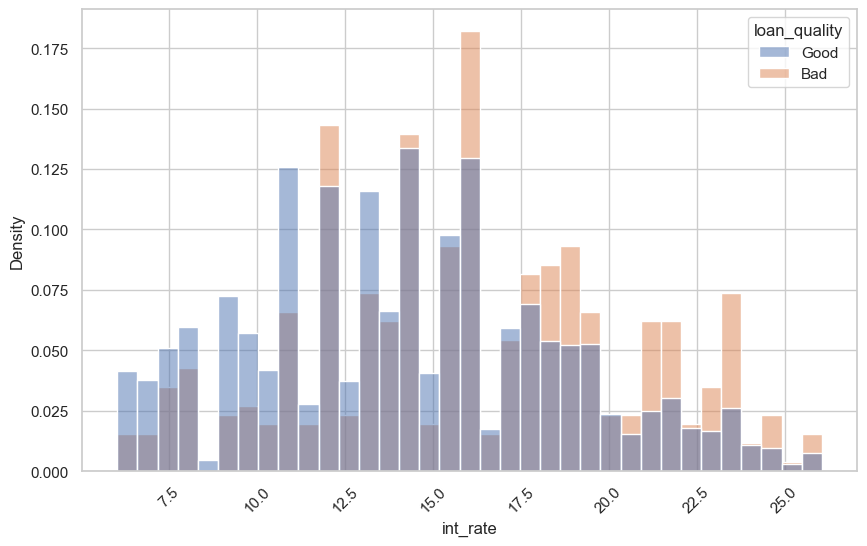

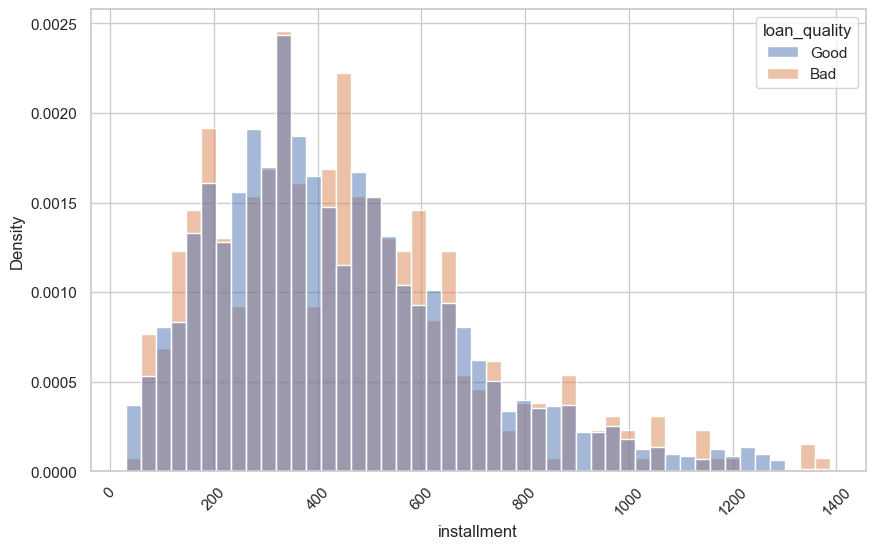

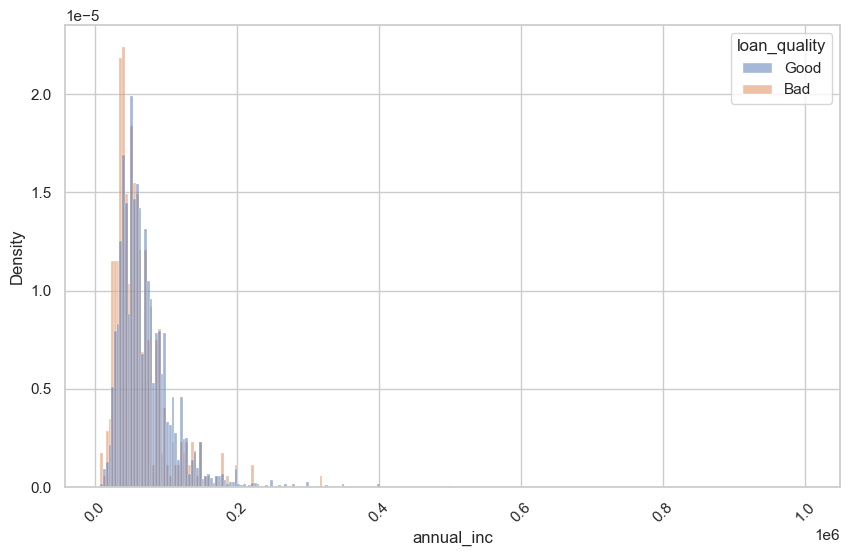

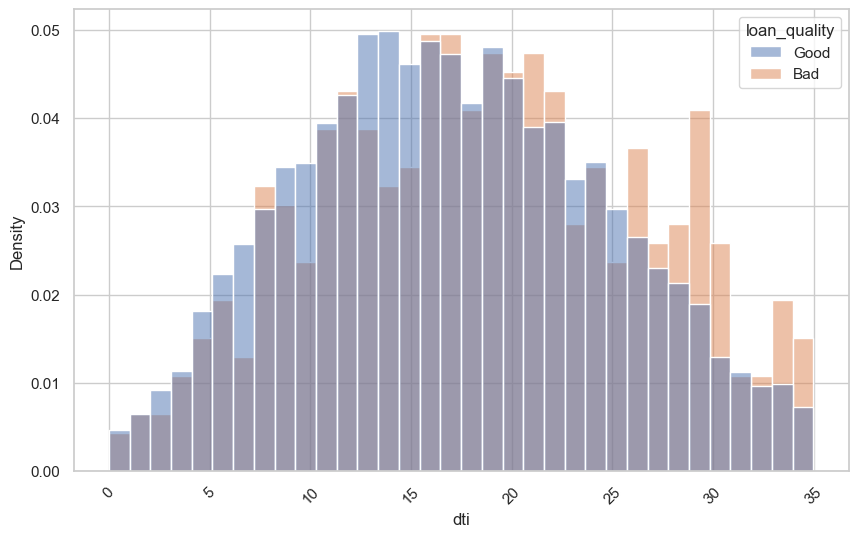

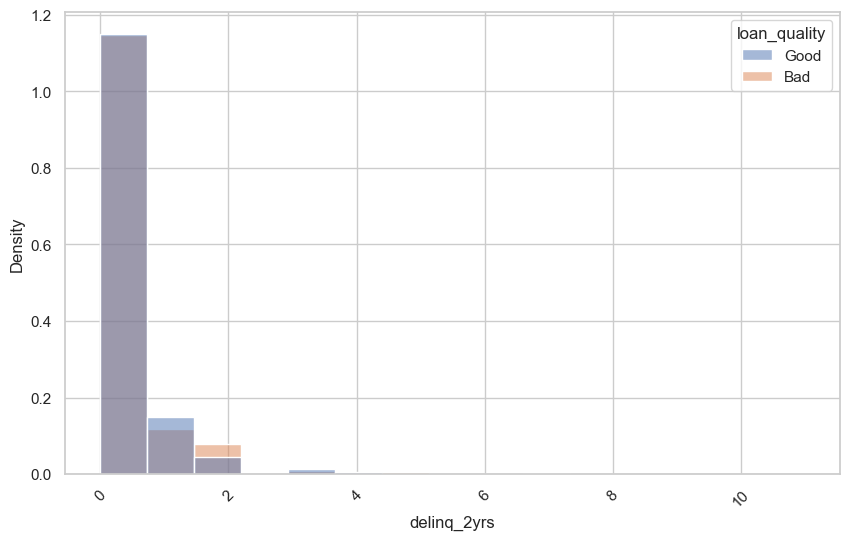

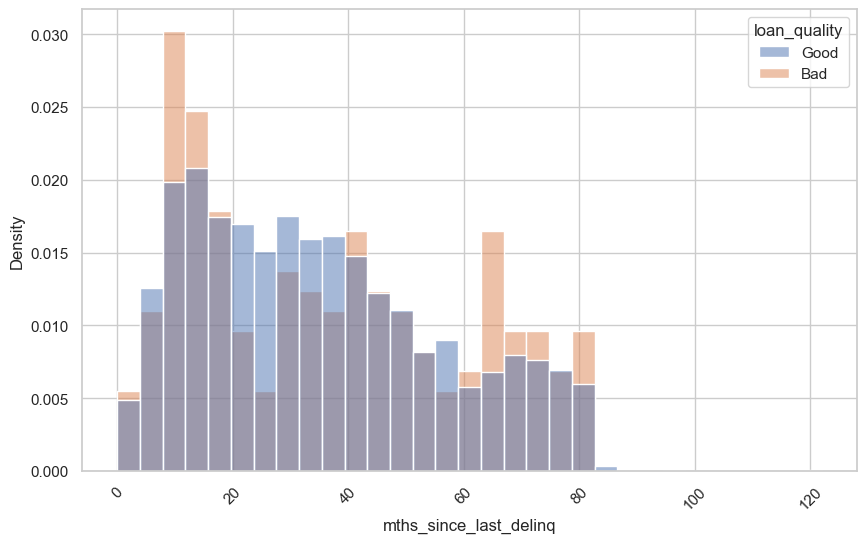

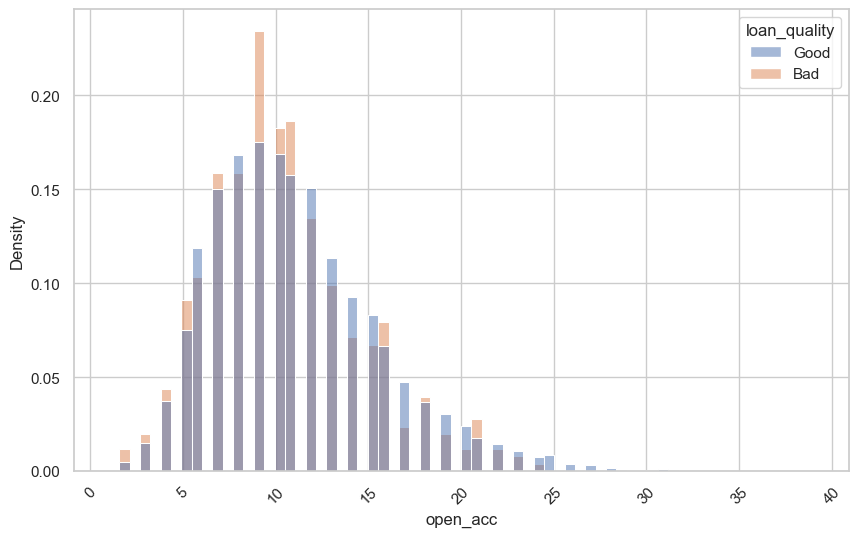

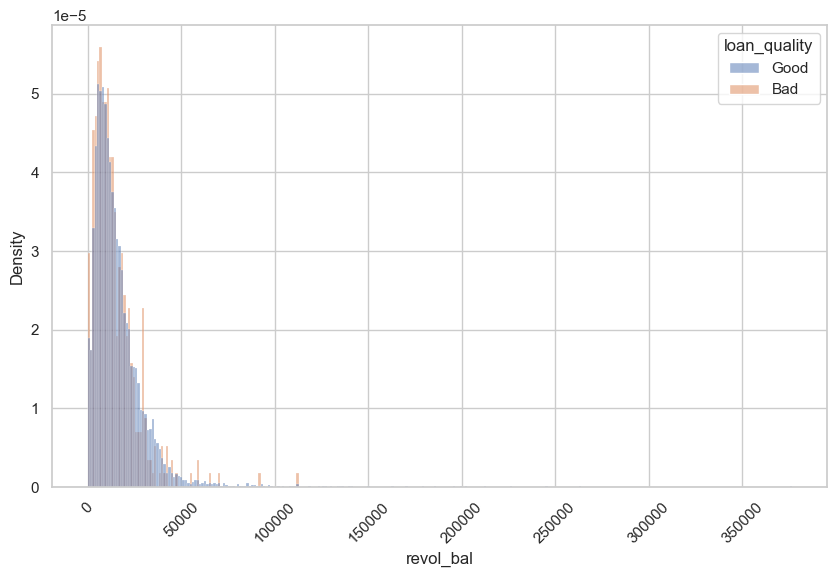

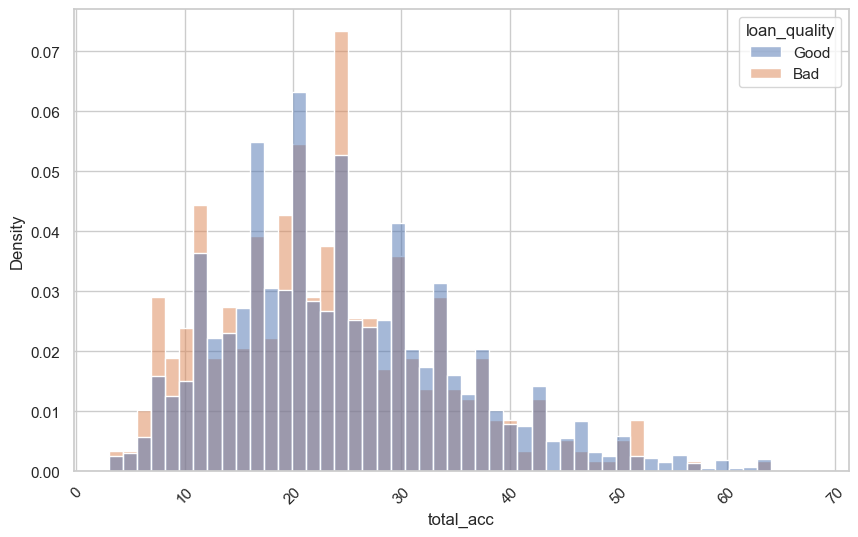

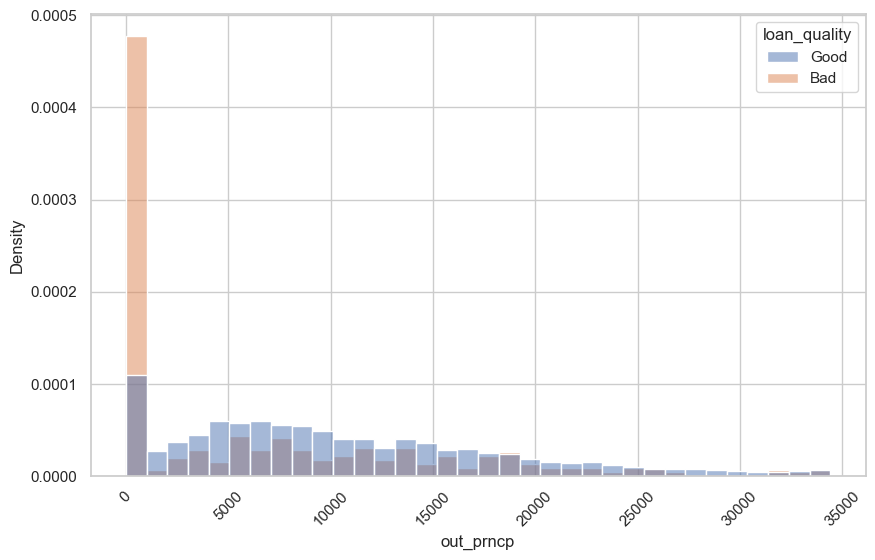

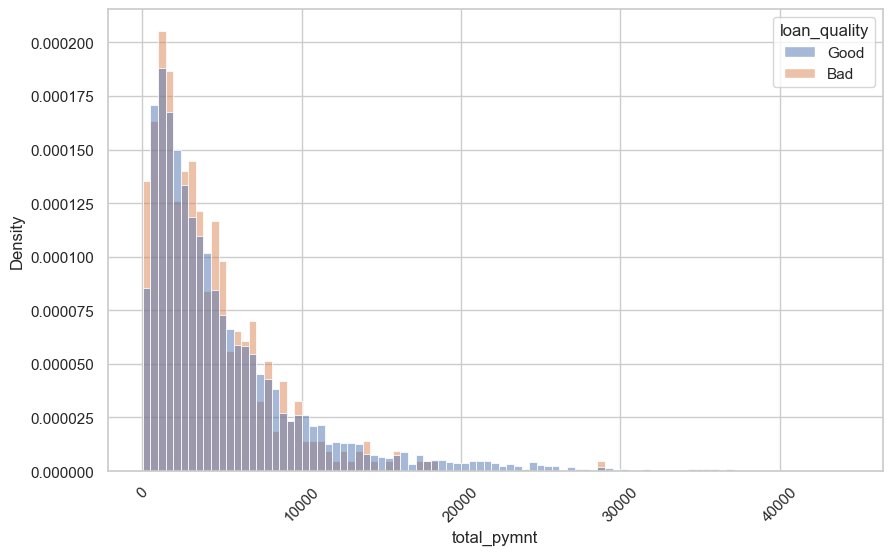

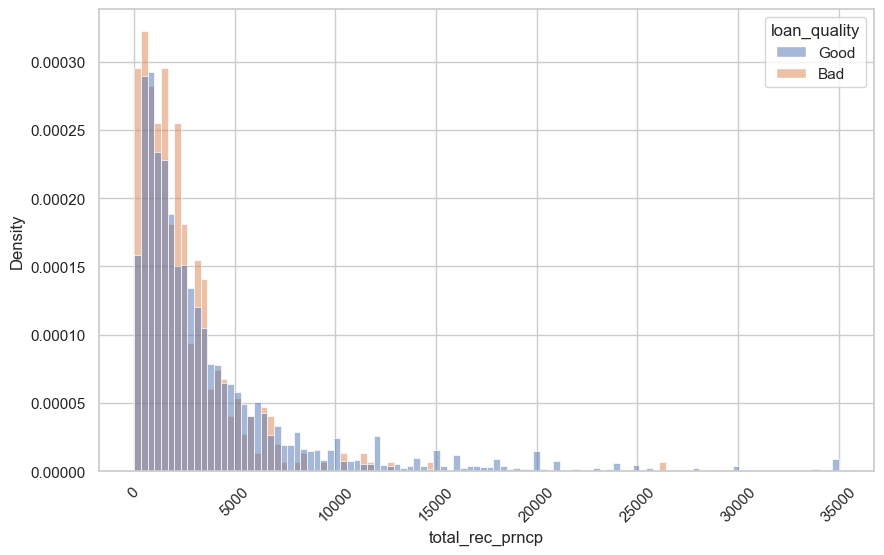

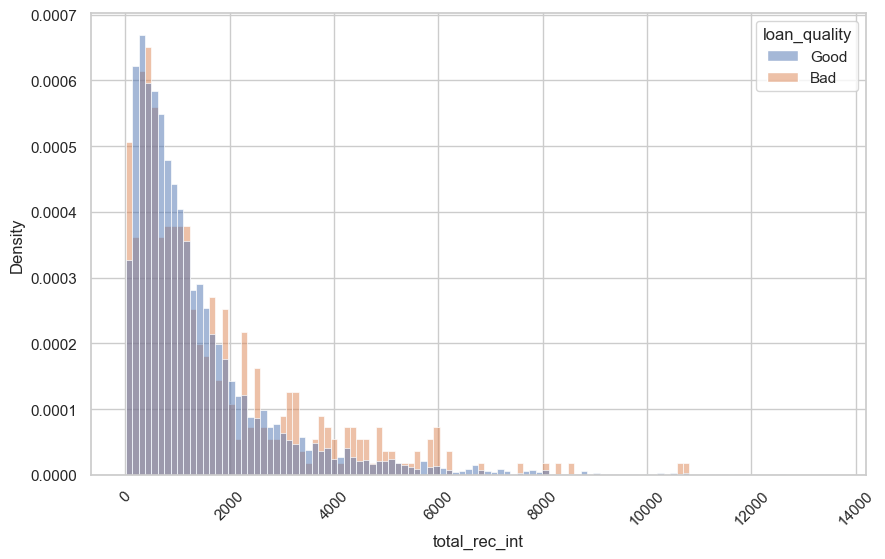

In [210]:
for col in numeric_features:
    ax = plt.figure(figsize=(10,6))
    ax = sns.histplot(df, x=col, hue='loan_quality', element='bars', stat='density', common_norm=False)
    plt.xticks(rotation=45)
    plt.show()

In [213]:
df[df['out_prncp']==0]

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,mths_since_last_delinq,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,days_since_earliest_cr_line,loan_quality
3,843448,5500,5500,36.0,13.67,187.10,3 years,RENT,55000.0,Fully Paid,...,NaN,17.0,9486.0,25.0,0.0,5792.14,5500.0,292.14,13291.0,Good
5,1023119,1400,1400,36.0,15.96,49.20,3 years,MORTGAGE,67000.0,Fully Paid,...,61.0,8.0,13806.0,14.0,0.0,1687.48,1400.0,287.48,7286.0,Good
9,1063649,17500,16800,60.0,22.74,471.10,6 years,MORTGAGE,95000.0,Charged Off,...,NaN,12.0,23722.0,23.0,0.0,4704.90,1662.3,3042.60,7987.0,Bad
13,1071862,8000,8000,36.0,6.03,243.49,7 years,MORTGAGE,60000.0,Fully Paid,...,NaN,18.0,20097.0,28.0,0.0,8293.20,8000.0,293.20,9720.0,Good
14,1073096,8500,8500,36.0,11.71,281.15,4 years,OWN,130500.0,Fully Paid,...,69.0,10.0,8356.0,18.0,0.0,9880.55,8500.0,1380.55,9056.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9336,9008907,30000,30000,36.0,13.67,1020.53,10+ years,MORTGAGE,1000000.0,Fully Paid,...,14.0,10.0,67298.0,30.0,0.0,30677.92,30000.0,677.92,14970.0,Good
9578,9797986,15000,15000,60.0,16.24,366.69,10+ years,MORTGAGE,70000.0,Fully Paid,...,NaN,8.0,11683.0,21.0,0.0,15203.31,15000.0,203.31,7941.0,Good
9595,9826934,18000,18000,60.0,21.48,491.84,7 years,RENT,90000.0,Fully Paid,...,NaN,12.0,20906.0,16.0,0.0,18322.29,18000.0,322.29,8094.0,Good
9677,10086013,1200,1200,36.0,19.22,44.13,10+ years,MORTGAGE,135000.0,Fully Paid,...,11.0,16.0,44358.0,48.0,0.0,1219.36,1200.0,19.36,17644.0,Good


##### Numeric variables key insights:
- Some variables look like they have some sort of relationship to whether a loan is good or bad, but it may not be linear.
- Loans with higher interest rates have a higher rate of bad loans than lower interest rate loans.
- Lower income users typically will have a bad loan.
- Not having delinquencies in the last 2 years is a good sign for the loan.
- 60 month term loans have a higher rate of being bad.
- We see that users with an outstanding principle of 0 have a higher rate of having bad loans, which sounds counterintuitive at first. This occurs because of the definition of a bad loan where a charged off account may not have an outstanding balance to us anymore.

In [214]:
cat_features = ['emp_length', 'home_ownership', 'loan_status', 'purpose', 'addr_state', 'loan_quality']

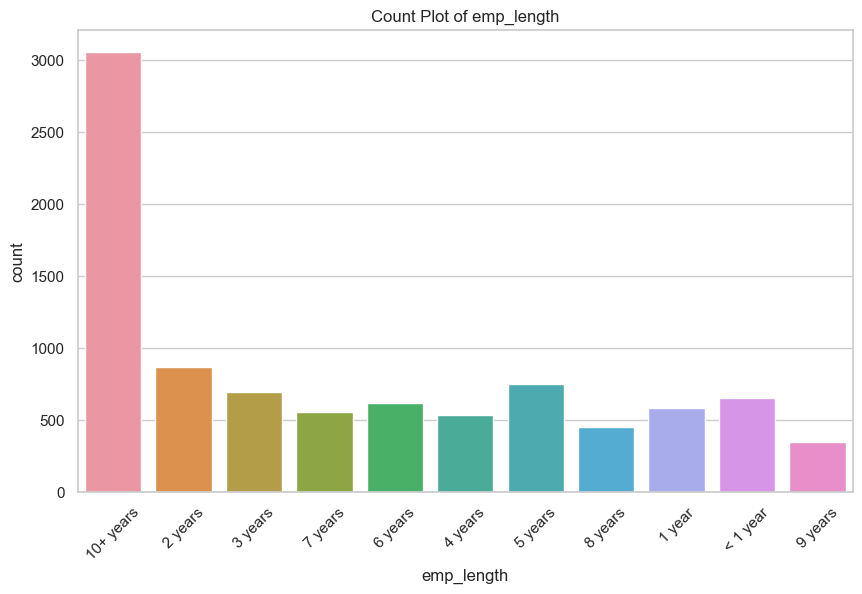

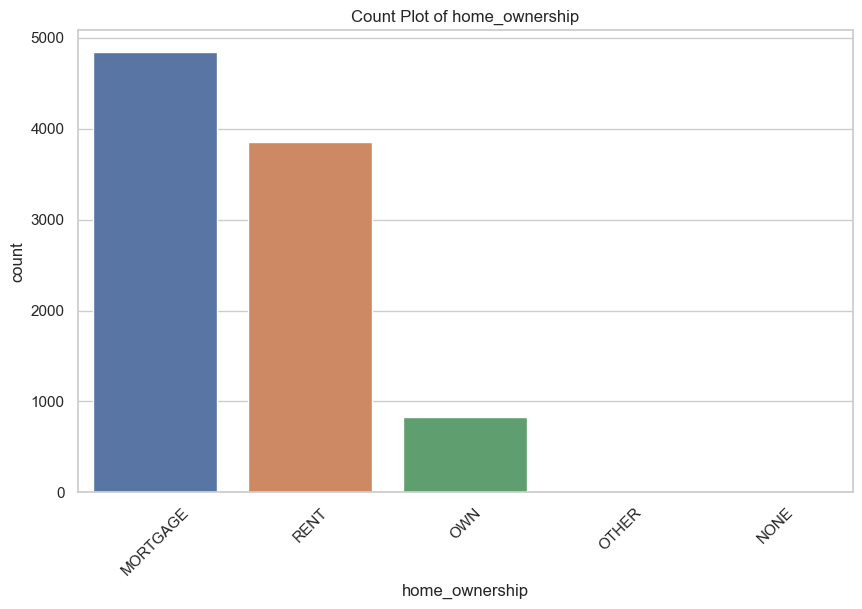

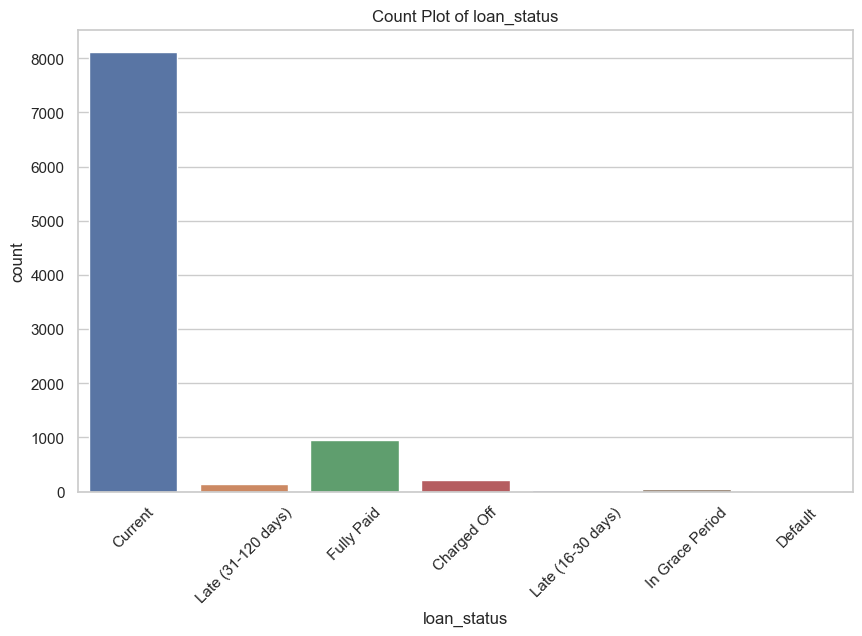

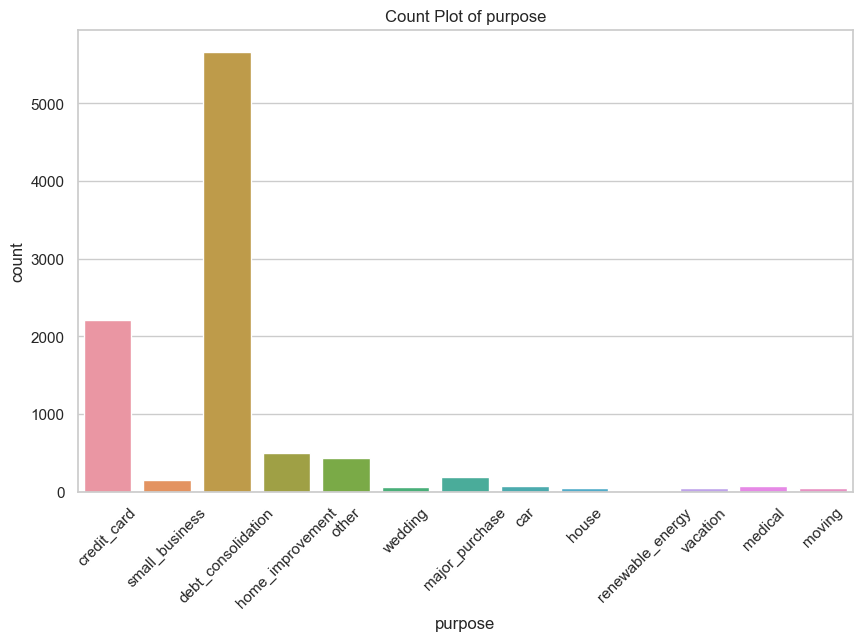

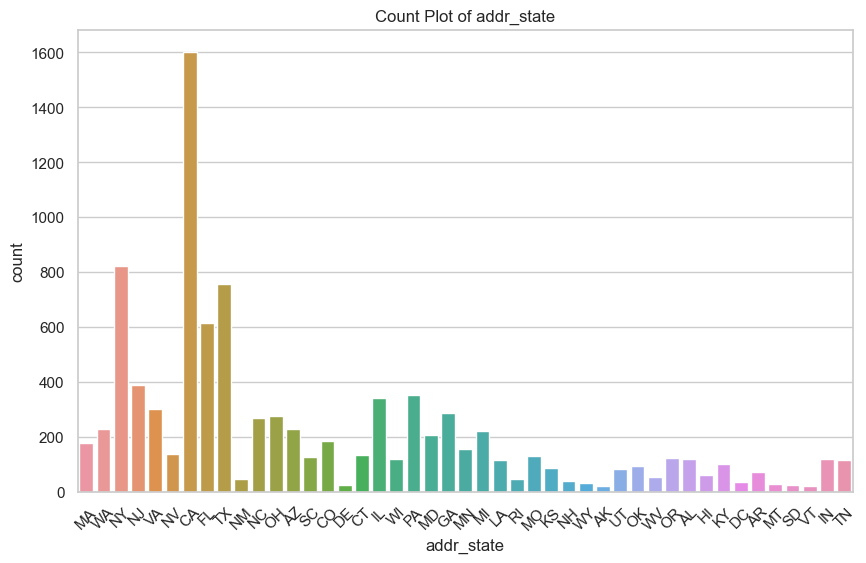

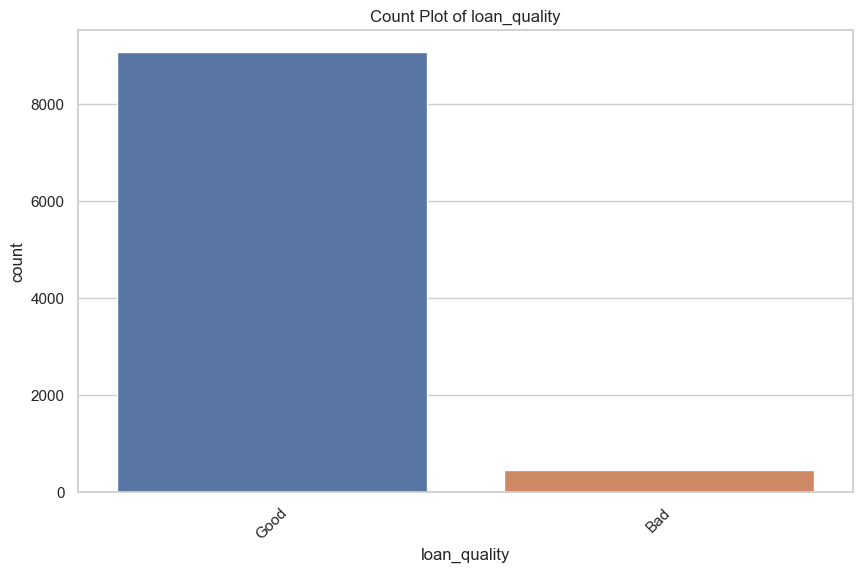

In [215]:
for col in cat_features:
    plot_data_distribution(df, col, plot_type='count')

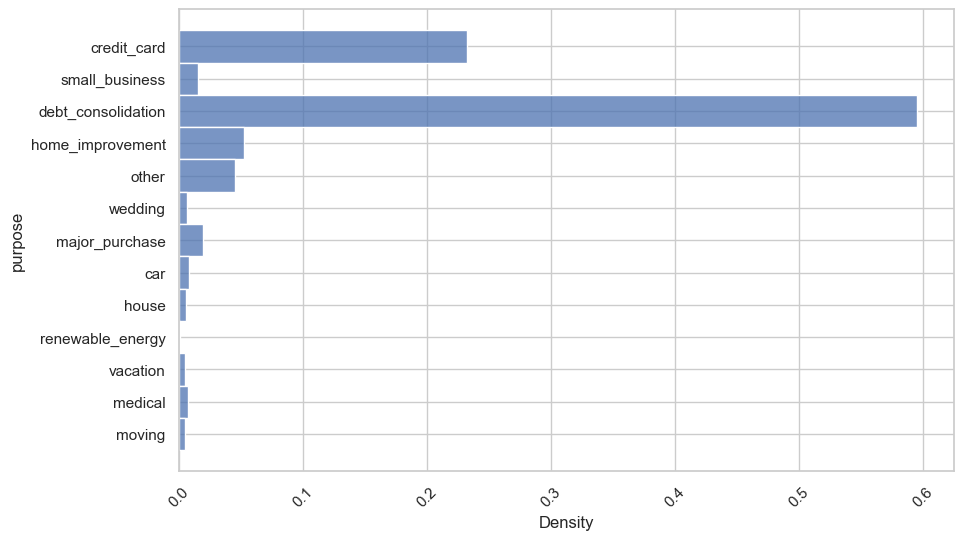

In [216]:
ax = plt.figure(figsize=(10,6))
ax = sns.histplot(df, y='purpose', element='bars', stat='density', common_norm=False, bins=10)
plt.xticks(rotation=45)
plt.show()

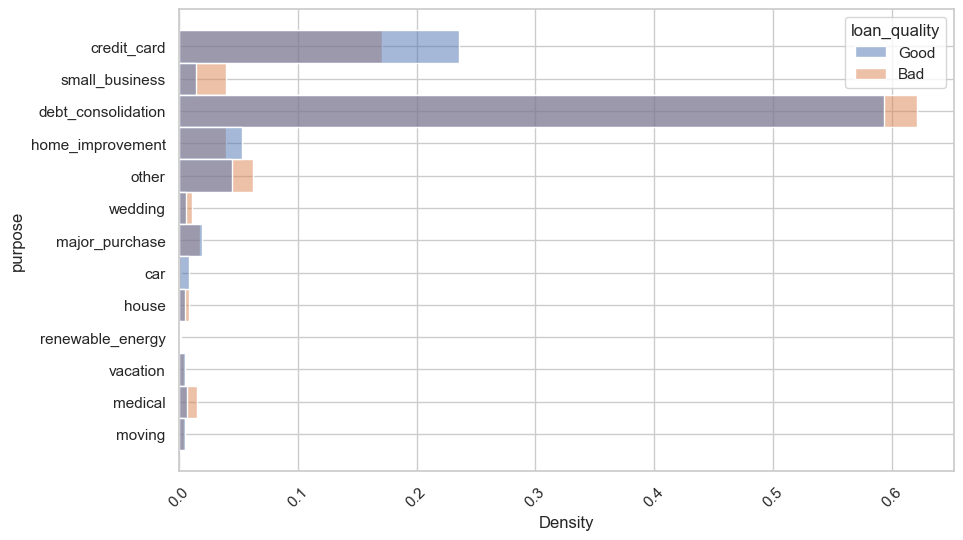

In [217]:
ax = plt.figure(figsize=(10,6))
ax = sns.histplot(df, y='purpose', hue='loan_quality', element='bars', stat='density', common_norm=False, bins=10)
plt.xticks(rotation=45)
plt.show()

##### Loans taken out for small businesses, debt consolidation, weddings, house, medical, and other have higher rates of bad loans.

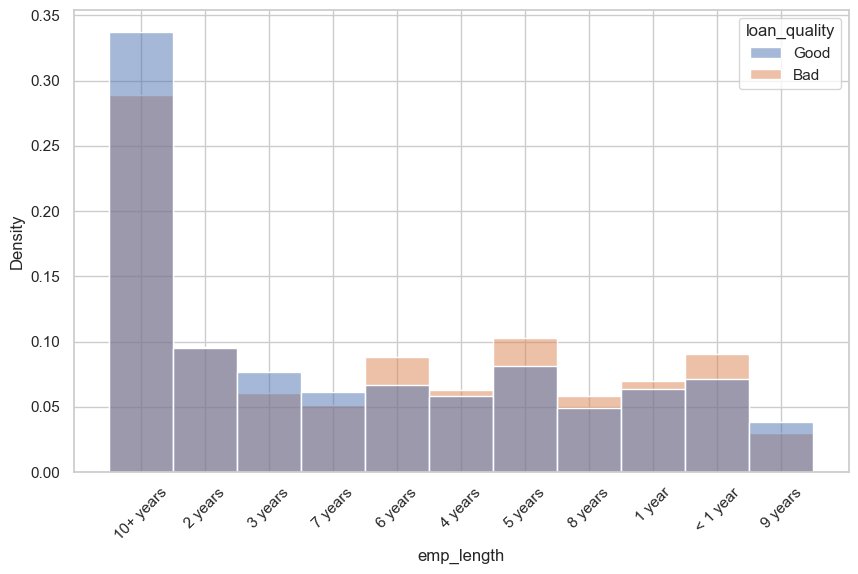

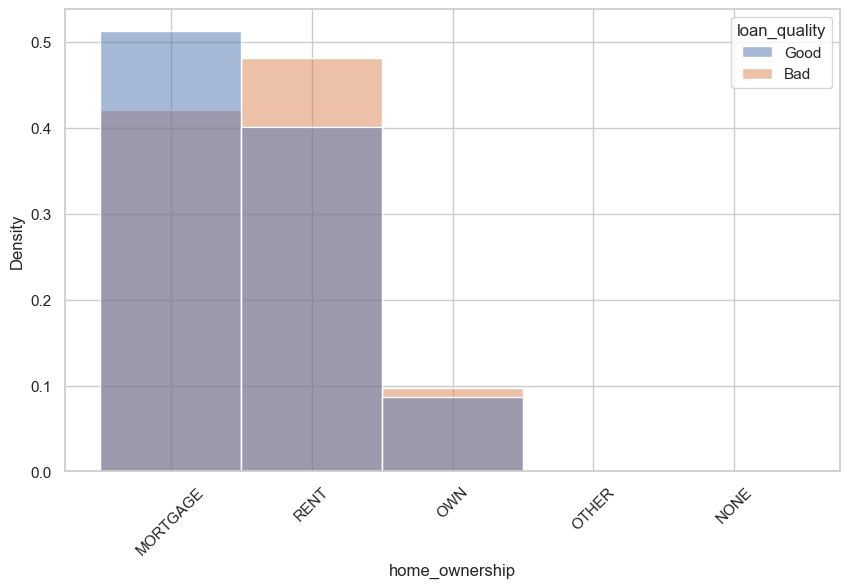

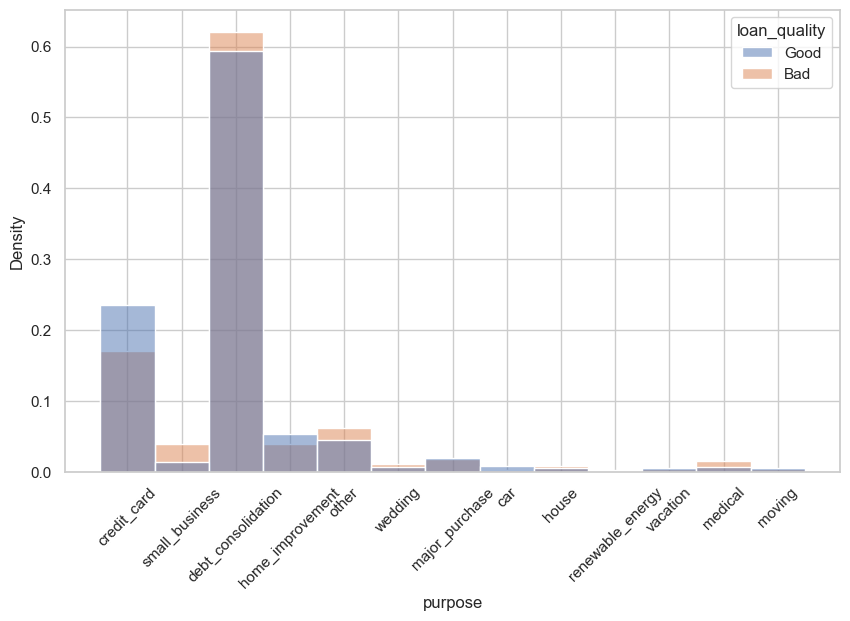

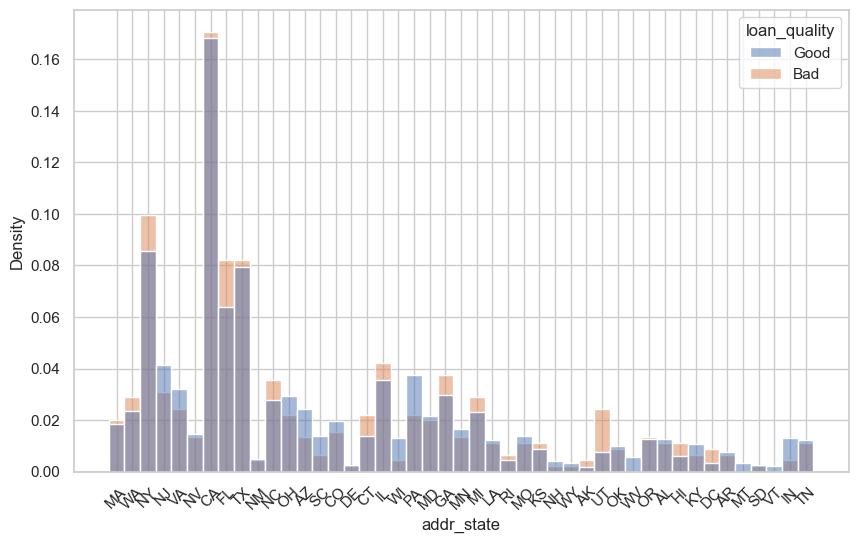

In [218]:
for col in ['emp_length', 'home_ownership', 'purpose', 'addr_state']:
    ax = plt.figure(figsize=(10,6))
    ax = sns.histplot(df, x=col, hue='loan_quality', element='bars', stat='density', common_norm=False, bins=10)
    plt.xticks(rotation=45)
    plt.show()

##### Categorical features key takeaways:
- People that rent have a higher rate of bad loans.
- There does not seem to be a clear linear relationship for employment history with bad loans, but very low employment history does seem to have more bad loans.
- Loans taken out for small businesses, debt consolidation, weddings, house, medical, and other have higher rates of bad loans.

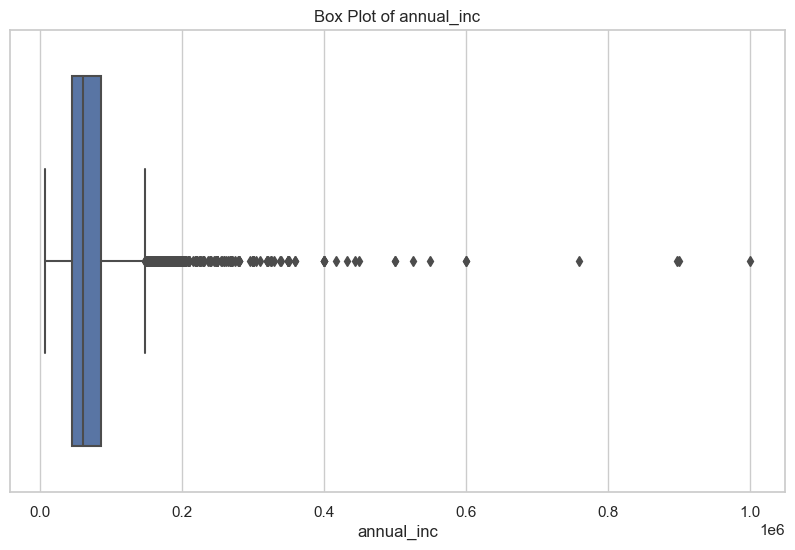

In [51]:
plot_data_distribution(df, 'annual_inc', plot_type='box')

##### We see high income outliers in the data.

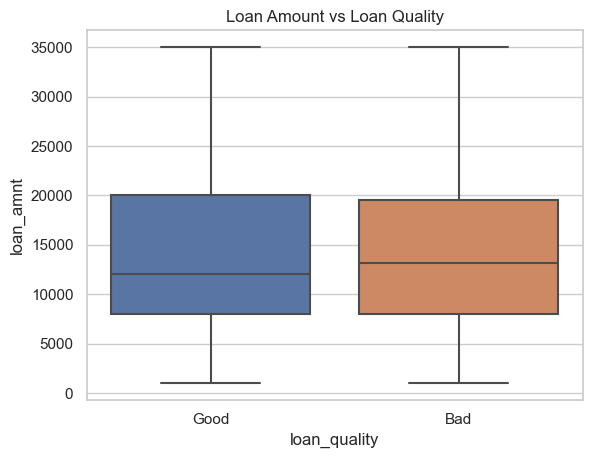

In [84]:
sns.boxplot(x='loan_quality', y='loan_amnt', data=df)
plt.title('Loan Amount vs Loan Quality')
plt.show()

##### Bad loans have a slightly higher average amount than the good loans.

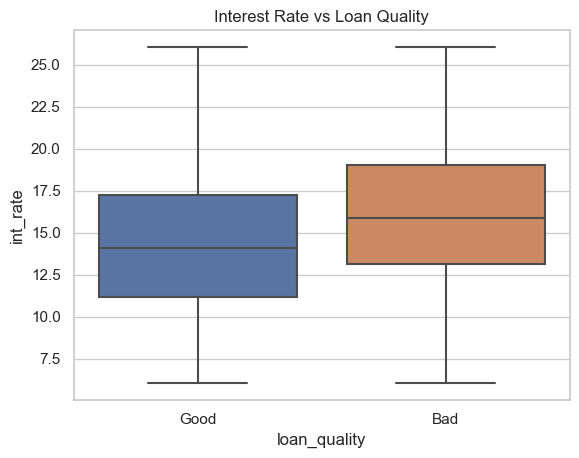

In [219]:
sns.boxplot(x='loan_quality', y='int_rate', data=df)
plt.title('Interest Rate vs Loan Quality')
plt.show()

##### Higher interest rates are clearly related to bad loans.

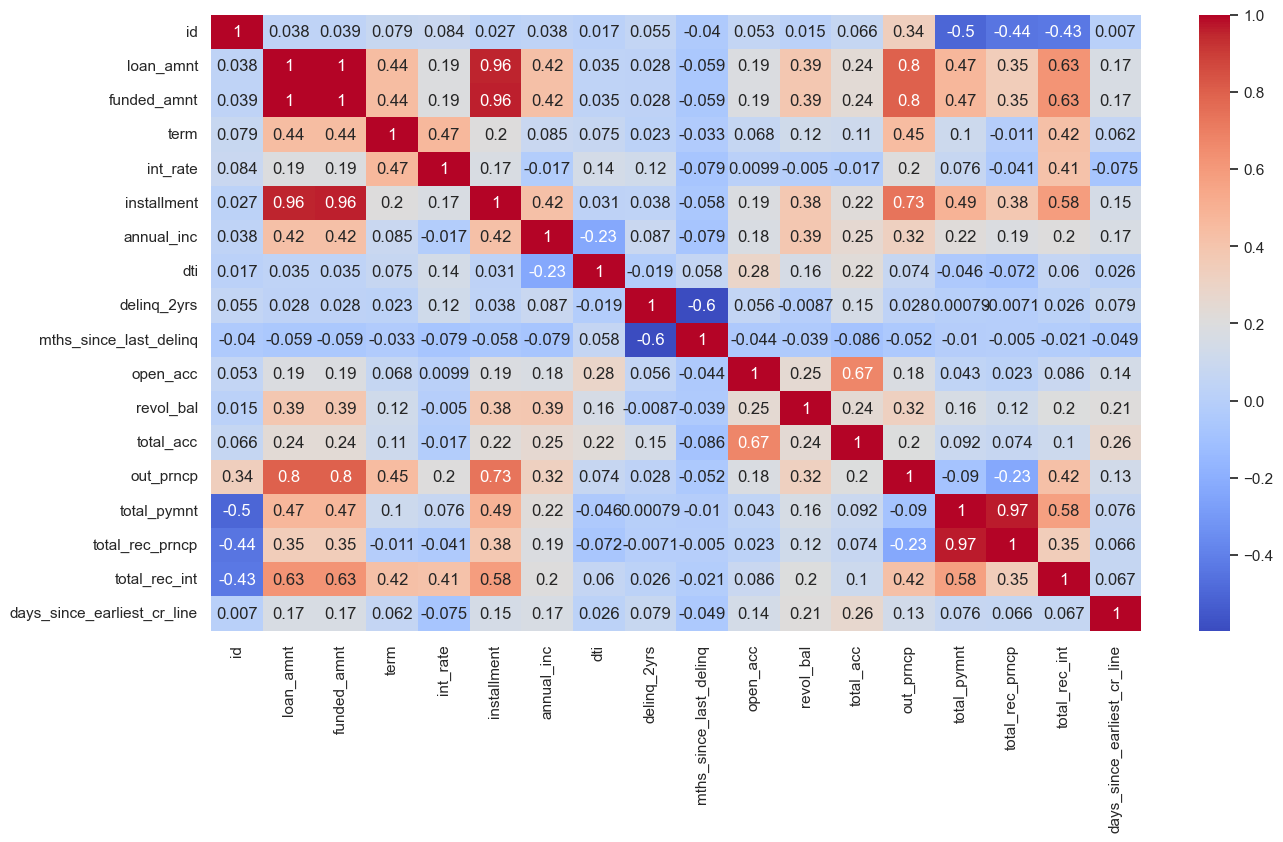

In [220]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.show()

##### We see that some of our features are linearly corrleated. These features would be an issue if we decide to use algorithms like logistic regression. If we would still like to experiment with logistic regression we could either use PCA for the correlated features or we could drop the highly correlated features so only one remains. As a result, it would be simpler to proceed with a tree based algorithm to reduce the amount of preprocessing needed for model building.

In [221]:
df.isnull().sum()

id                                0
loan_amnt                         0
funded_amnt                       0
term                              0
int_rate                          0
installment                       0
emp_length                      405
home_ownership                    0
annual_inc                        0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
mths_since_last_delinq         5424
open_acc                          0
revol_bal                         0
total_acc                         0
out_prncp                         0
total_pymnt                       0
total_rec_prncp                   0
total_rec_int                     0
days_since_earliest_cr_line       0
loan_quality                      0
dtype: int64

## Preprocessing and Model Building

##### After filtering our dataset down to only the "Good" and "Bad" loans, we only have two variables that remain with null values. These variables are emp_length and mths_since_last_delinq. I believe that the missing value is actually informative in this case as it is interpretable as an individual being unemployed or never being delinquent. I will keep this in mind when applying preprocessing to the data. 

##### Through our EDA, I have decided that it would be simpler to use tree based algorithms in order to use as many of the available features as possible and to uncover non linear relationships.

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 9749
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           9524 non-null   int64         
 1   loan_amnt                    9524 non-null   int64         
 2   funded_amnt                  9524 non-null   int64         
 3   term                         9524 non-null   float64       
 4   int_rate                     9524 non-null   float64       
 5   installment                  9524 non-null   float64       
 6   emp_length                   9119 non-null   object        
 7   home_ownership               9524 non-null   object        
 8   annual_inc                   9524 non-null   float64       
 9   loan_status                  9524 non-null   object        
 10  purpose                      9524 non-null   object        
 11  addr_state                   9524 non-null 

In [223]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 9749
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           9524 non-null   int64         
 1   loan_amnt                    9524 non-null   int64         
 2   funded_amnt                  9524 non-null   int64         
 3   term                         9524 non-null   float64       
 4   int_rate                     9524 non-null   float64       
 5   installment                  9524 non-null   float64       
 6   emp_length                   9119 non-null   object        
 7   home_ownership               9524 non-null   object        
 8   annual_inc                   9524 non-null   float64       
 9   loan_status                  9524 non-null   object        
 10  purpose                      9524 non-null   object        
 11  addr_state                   9524 non-null 

In [225]:
numerical_features = ['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 
                     'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'revol_bal', 
                      'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 
                      'total_rec_int', 'days_since_earliest_cr_line']
categorical_features = ['home_ownership', 'purpose', 'addr_state']
# Features to one-hot encode without imputation
no_impute_encode_features = ['emp_length']
# Features with no imputation or encoding
no_impute_no_encode_features = ['mths_since_last_delinq']


##### I am separating out the two features that currently have null values that we do not want to impute, but in the production setting we may want to train this model with other features in the no_impute_features list as well. 

In [226]:
X = df[numerical_features+categorical_features+no_impute_encode_features+no_impute_no_encode_features]
y = df['loan_quality'].map({'Good': 0, 'Bad': 1})

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [228]:
class CustomModel(BaseEstimator, TransformerMixin):
    def __init__(self, classifier=XGBClassifier()):
        """
        Initialize the model with a base classifier.
        """
        self.classifier = classifier
        self.pipeline = None
        self.grid_search = None

    def create_pipeline(self, num_features, cat_features, no_impute_encode_features, no_impute_no_encode_features):
        """
        Create a preprocessing pipeline with given numerical and categorical features.
        """
        # Numerical transformer (with imputation and scaling)
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        # Categorical transformer (with imputation and one-hot encoding)
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # One-hot encoding transformer (without imputation)
        onehot_no_impute_transformer = Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ])

        # Preprocessor for different types of features
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, [col for col in num_features if col not in no_impute_no_encode_features]),
                ('cat', categorical_transformer, [col for col in cat_features if col not in no_impute_encode_features]),
                ('onehot_no_impute', onehot_no_impute_transformer, no_impute_encode_features),
                ('no_impute_no_encode', 'passthrough', no_impute_no_encode_features)
            ])

        # Create the pipeline
        self.pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', self.classifier)
        ])
        return self.pipeline


    def fit(self, X, y, grid_params=None, scoring=None, cv=2):
        """
        Fit the model with optional grid search.
        """
        if grid_params is not None:
            self.grid_search = GridSearchCV(self.pipeline, grid_params, scoring=scoring, cv=cv, verbose=2, n_jobs=-1)
            self.grid_search.fit(X, y)
        else:
            self.pipeline.fit(X, y)

    def predict(self, X):
        """
        Make predictions using the fitted model.
        """
        if self.grid_search is not None:
            return self.grid_search.predict(X)
        else:
            return self.pipeline.predict(X)

    def print_classification_report(self, y_true, y_pred):
        """
        Print the classification report.
        """
        print(classification_report(y_true, y_pred))
        
    def print_best_params(self):
        """
        Print the best parameters found by GridSearchCV.
        """
        if self.grid_search is not None:
            print("Best parameters found:", self.grid_search.best_params_)
        else:
            print("Grid search was not used.")

    def plot_roc_curve(self, X_test, y_test):
        """
        Plot the ROC curve for the test data.
        """
        if self.grid_search is not None:
            best_estimator = self.grid_search.best_estimator_
        else:
            best_estimator = self.pipeline

        y_scores = best_estimator.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
    def get_feature_importances(self):
        """
        Get feature importances from the classifier.
        """
        if self.pipeline is None or (self.grid_search is not None and not self.grid_search.best_estimator_):
            raise NotFittedError("This CustomModel instance is not fitted yet.")

        if self.grid_search:
            preprocessor = self.grid_search.best_estimator_.named_steps['preprocessor']
            classifier = self.grid_search.best_estimator_.named_steps['classifier']
        else:
            preprocessor = self.pipeline.named_steps['preprocessor']
            classifier = self.pipeline.named_steps['classifier']

        feature_names = preprocessor.get_feature_names_out()

        importances = classifier.feature_importances_

        feature_importances = pd.Series(importances, index=feature_names)

        return feature_importances



In [229]:
model = CustomModel(XGBClassifier())
model.create_pipeline(numerical_features, categorical_features, no_impute_encode_features, no_impute_no_encode_features)

model.fit(X_train, y_train, scoring='roc_auc')
predictions = model.predict(X_test)
model.print_classification_report(y_test, predictions)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2731
           1       0.98      0.48      0.65       127

    accuracy                           0.98      2858
   macro avg       0.98      0.74      0.82      2858
weighted avg       0.98      0.98      0.97      2858



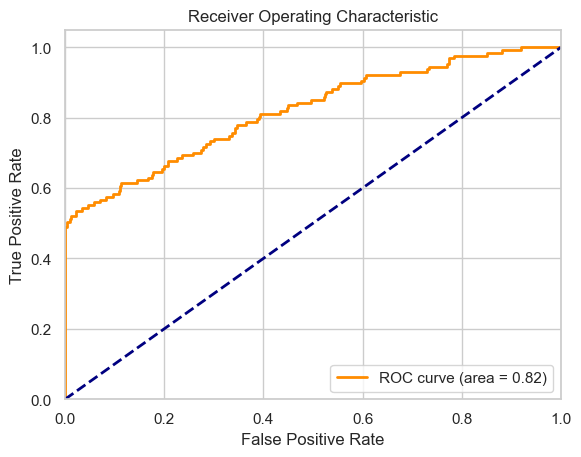

In [230]:
model.plot_roc_curve(X_test, y_test)

##### Before any tuning or addressing the class imbalance, we see that our model struggles with predicting the minority class. We can address this by using sampling techniques, but XGBoost has the scale_pos_weight parameter which increases the weight of the minority class. There are also other parameters we can tune that could increase recall for the minority class like max_depth, min_child_weight, gamma, and others. I will not do an exhaustive grid search, but will demonstrate the ability.

In [231]:
class_counts = y_train.value_counts()
scale_pos_weight_value = class_counts[0] / class_counts[1] 
print("Calculated scale_pos_weight: ", scale_pos_weight_value)

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 4],
    'classifier__scale_pos_weight': [scale_pos_weight_value / 2, scale_pos_weight_value, scale_pos_weight_value * 2]

}

Calculated scale_pos_weight:  19.574074074074073


Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best parameters found: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__scale_pos_weight': 19.574074074074073}
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2731
           1       0.27      0.57      0.36       127

    accuracy                           0.91      2858
   macro avg       0.62      0.75      0.66      2858
weighted avg       0.95      0.91      0.93      2858



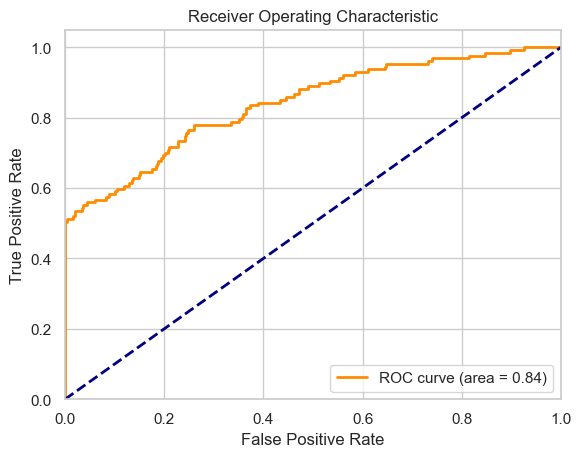

In [232]:
model = CustomModel(XGBClassifier())
model.create_pipeline(numerical_features, categorical_features, no_impute_encode_features, no_impute_no_encode_features)

model.fit(X_train, y_train, grid_params=param_grid, scoring='roc_auc')
model.print_best_params()

predictions = model.predict(X_test)

model.print_classification_report(y_test, predictions)
model.plot_roc_curve(X_test, y_test)

##### This model may seem to perform worse at first glance due to the drop in minority class precision and recall of the majority class, but it may actually be a better choice depending on the business context. This is because we end up capturing a bigger number of the minority class (recall). If mispredicting a bad loan as good then we may be more interested in boosting this metric even at the cost of increasing False Positives. 

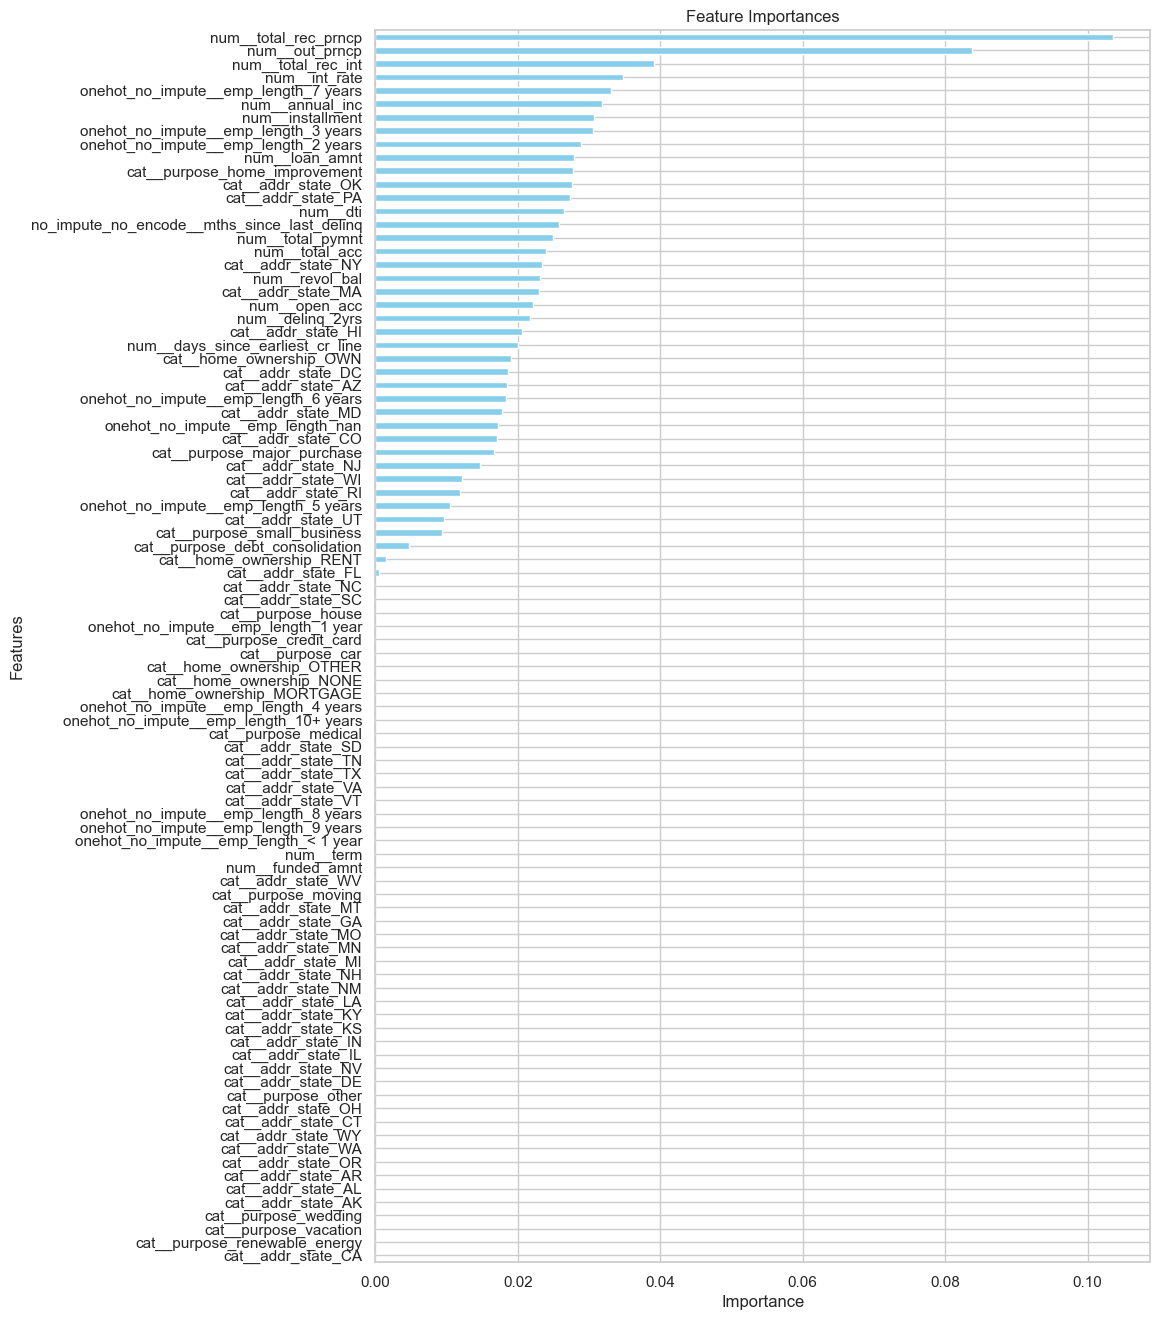

[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__scale_pos_weight=9.787037037037036; total time=   0.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=4, classifier__n_estimators=100, classifier__scale_pos_weight=19.574074074074073; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=4, classifier__n_estimators=200, classifier__scale_pos_weight=39.148148148148145; total time=   0.5s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=200, classifier__scale_pos_weight=19.574074074074073; total time=   0.3s
[CV] END classifier__learning_rate=0.1, classifier__max_depth=4, classifier__n_estimators=100, classifier__scale_pos_weight=39.148148148148145; total time=   0.3s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200, classifier__scale_pos_weight=9.787037037037036; total time=   0.5s
[CV] END classifier_

In [233]:
feature_importances = model.get_feature_importances()

plt.figure(figsize=(10, 16))
feature_importances.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

##### We see a lot of the loan information go to the top for feature importance. Keep in mind that built in feature importance typically favors variables with high cardinality. Given extra time I would explore additional methods of generating feature importances especially ones that would be more easily digested by stakeholders. This could include SHAP values or using eli5 library.

##### Depending on the goal of this model we would train and tune it differently. For example, if this model would be used to determine who we should and shouldn't give a loan, then many of the features wouldn't be available at scoring time and we should train the model without them e.g. we wouldn't know ahead of time the amount of payments made on the loan. This also relates to what we had discovered with the outstanding balance variable. Customers that had a 0 outstanding balance may have already charged off the debt and we no longer log it as outstanding on our end. If we are preemptively trying to identify loans that are bad, we may want to think further how this relates at scoring. We may want to have this model determine good and bad loans to preemptively identify bad loans that have already been given out. By identifying these "at risk" loans we could reach out to customers with educational information to stay on track or work with them to make any sort of payment so that they do not fully default. 

##### The use case of the model would determine what level of precision and recall we want and which metrics to optimize for. If the cost of false positives is relatively low and missing bad loans is very high then we would be okay over predicting. Thus, we would want to boost our recall on the minority class and consider optimizing for metrics like F beta where beta >1 which would weigh recall heavier.

##### Lastly, increasing the grid search would inevitably squeeze some more juice out of the model and other sampling techniques should be considered. Depending on how the model is used, we may also want to consider making the predictions well calibrated if being used as probabilities. In a production environment I would separate out the preprocessing done into a single function with any feature engineering to get the dataset into a structure that is usable by the pipeline object.